In [1]:
import warnings

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
credit_data = pd.read_csv("creditcard.csv")
print(credit_data.info())
credit_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
print(credit_data.skew())

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64


In [4]:
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


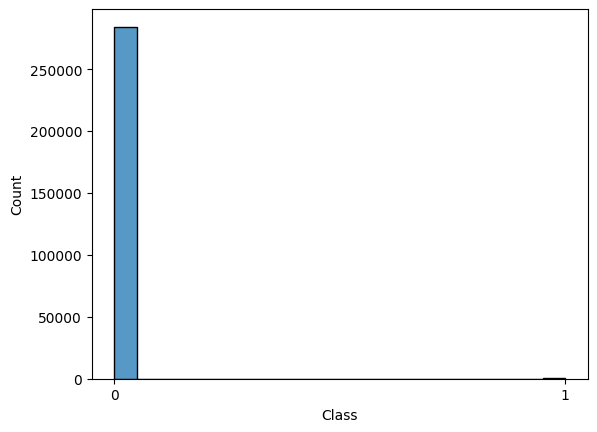

In [5]:

g= sns.histplot(credit_data["Class"])
g.set_xticks([0,1])

In [6]:
def multi_hist_plot(df_train,df_test, df_train_label, df_test_label, feature):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 12))

    sns.histplot(data = df_train , ax=axes[0], x = feature , hue = df_train_label,palette = sns.color_palette(["yellow" , "green",'red','blue','black','orange','purple']) ,multiple = "stack" ).set_title(f"{feature} Vs ")
    axes[0].set_title('Histogram of Train Data '+feature)

    sns.histplot(data = df_test , ax=axes[1], x = feature , hue = df_test_label,palette = sns.color_palette(["yellow" , "green",'red','blue','black','orange','purple']) ,multiple = "stack" ).set_title(f"{feature} Vs ")
    axes[1].set_title('Histogram of Test Data '+feature)
    plt.tight_layout()  # Adjust layout to prevent overlap
    
    plt.show()

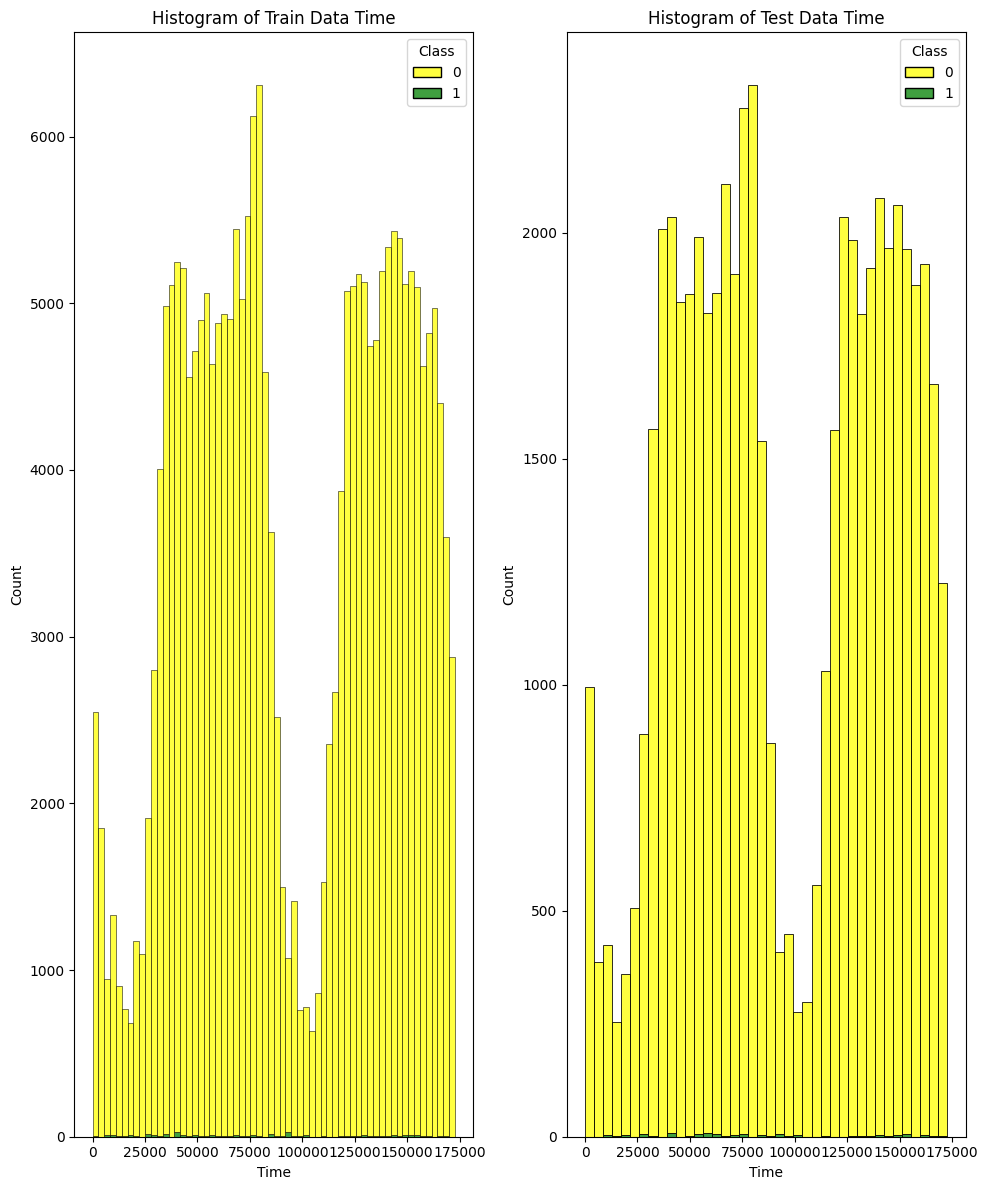

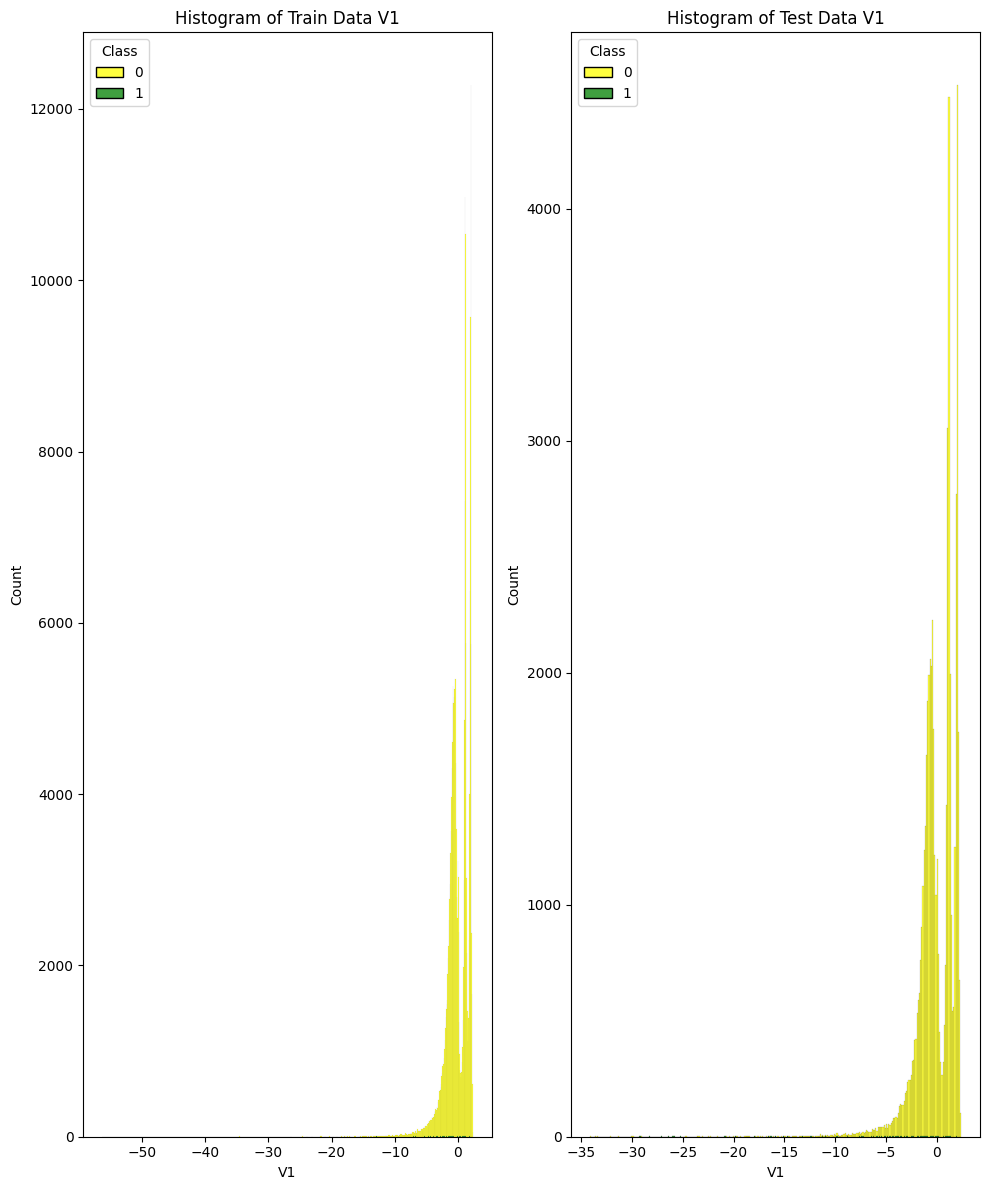

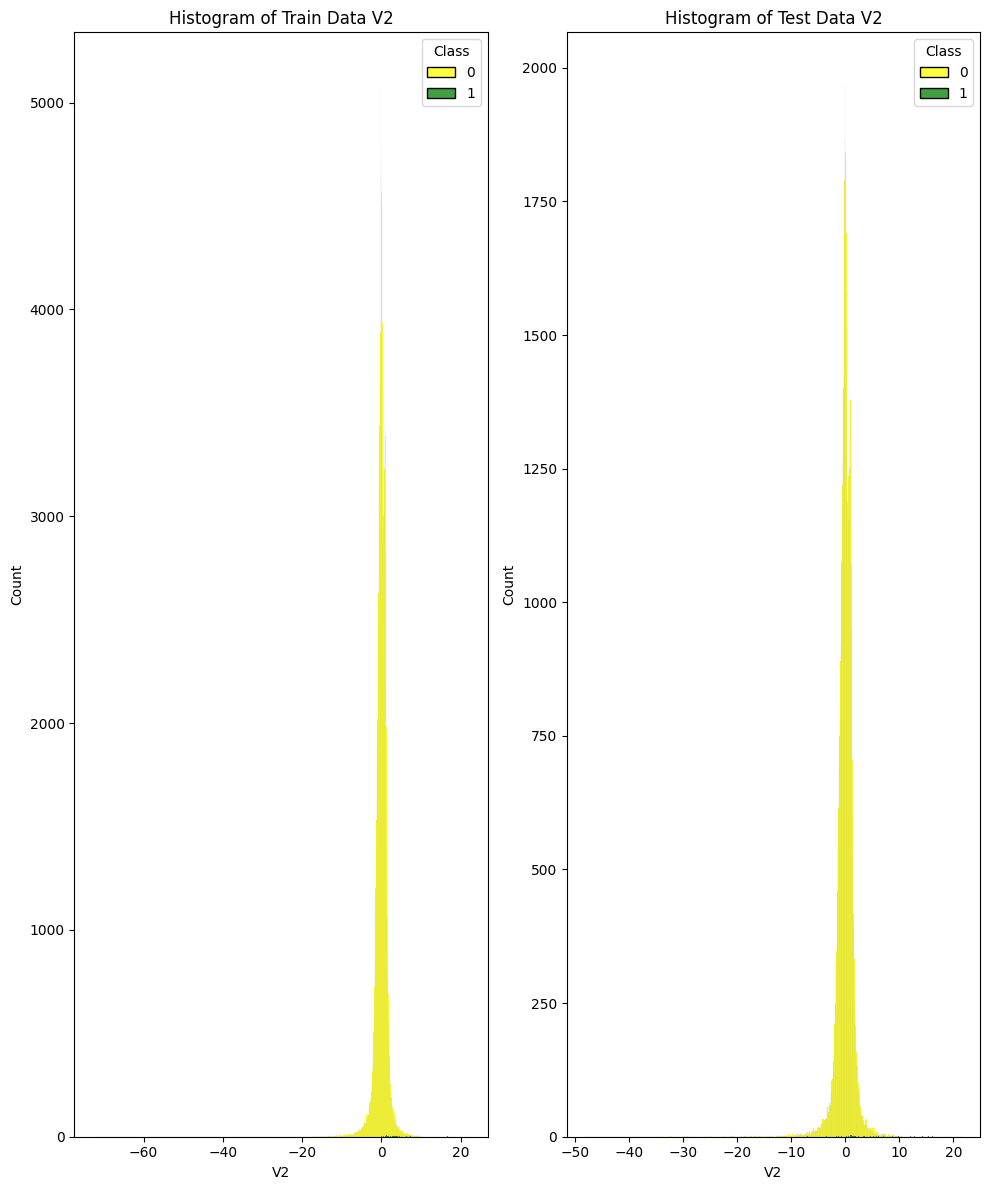

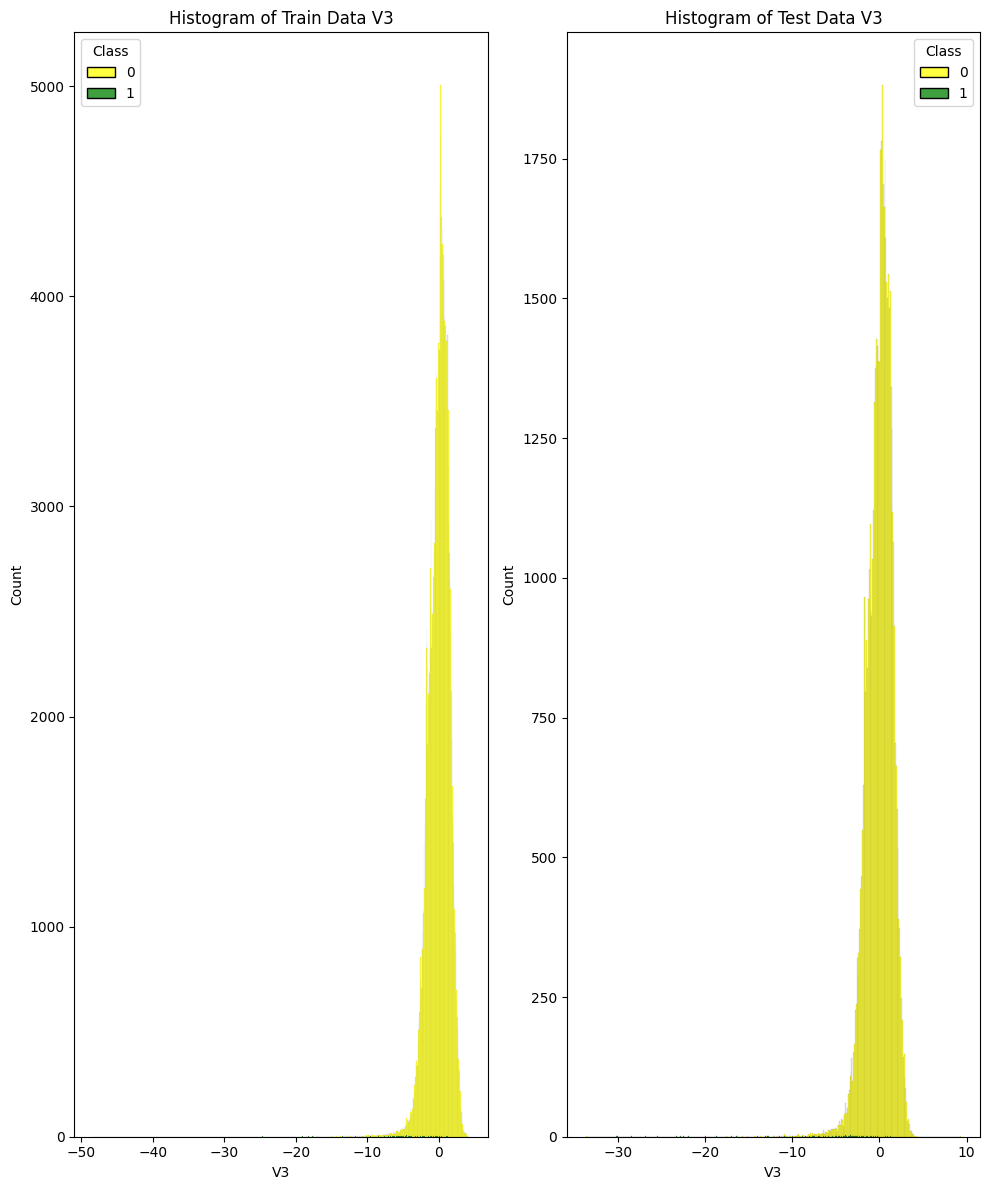

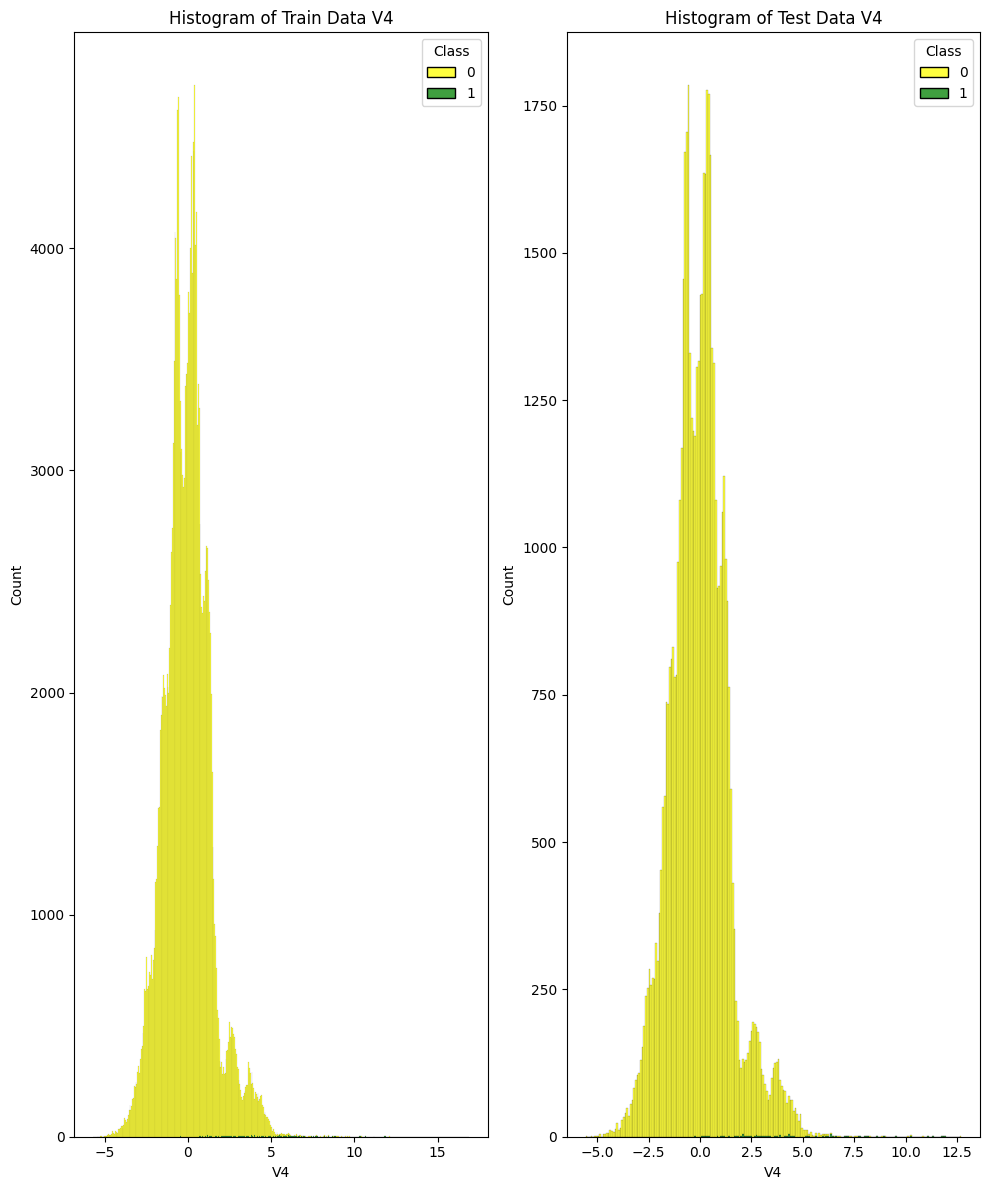

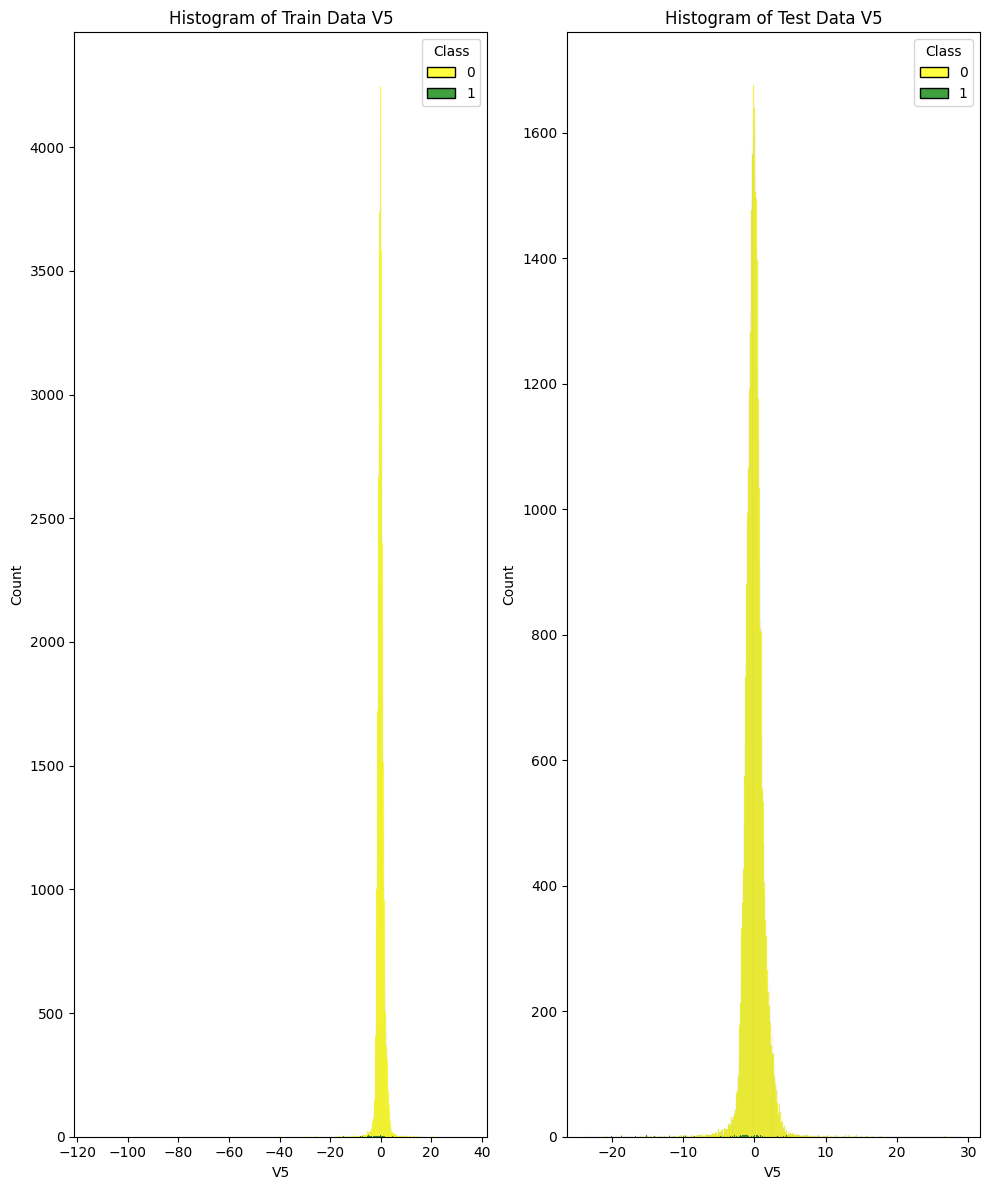

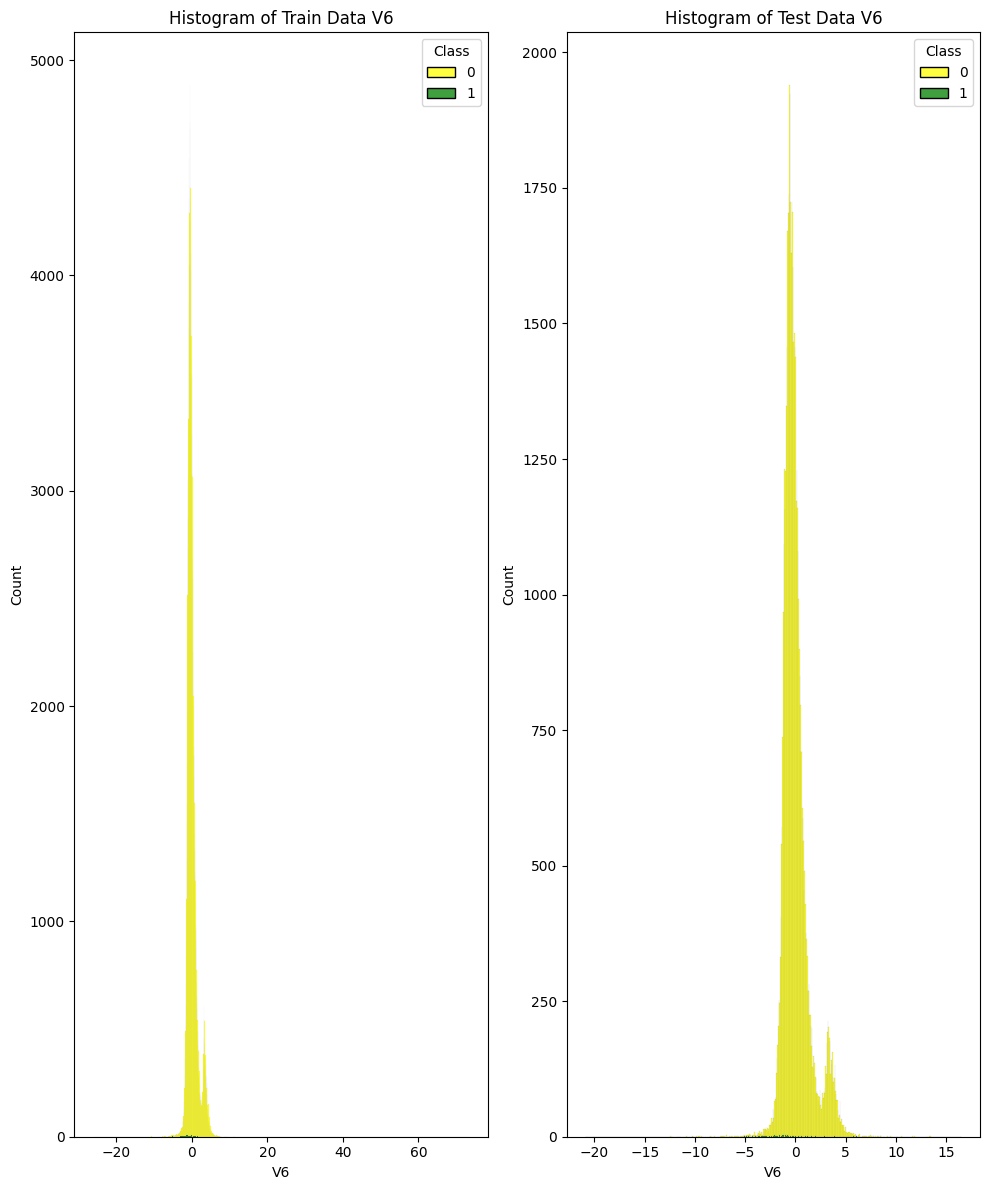

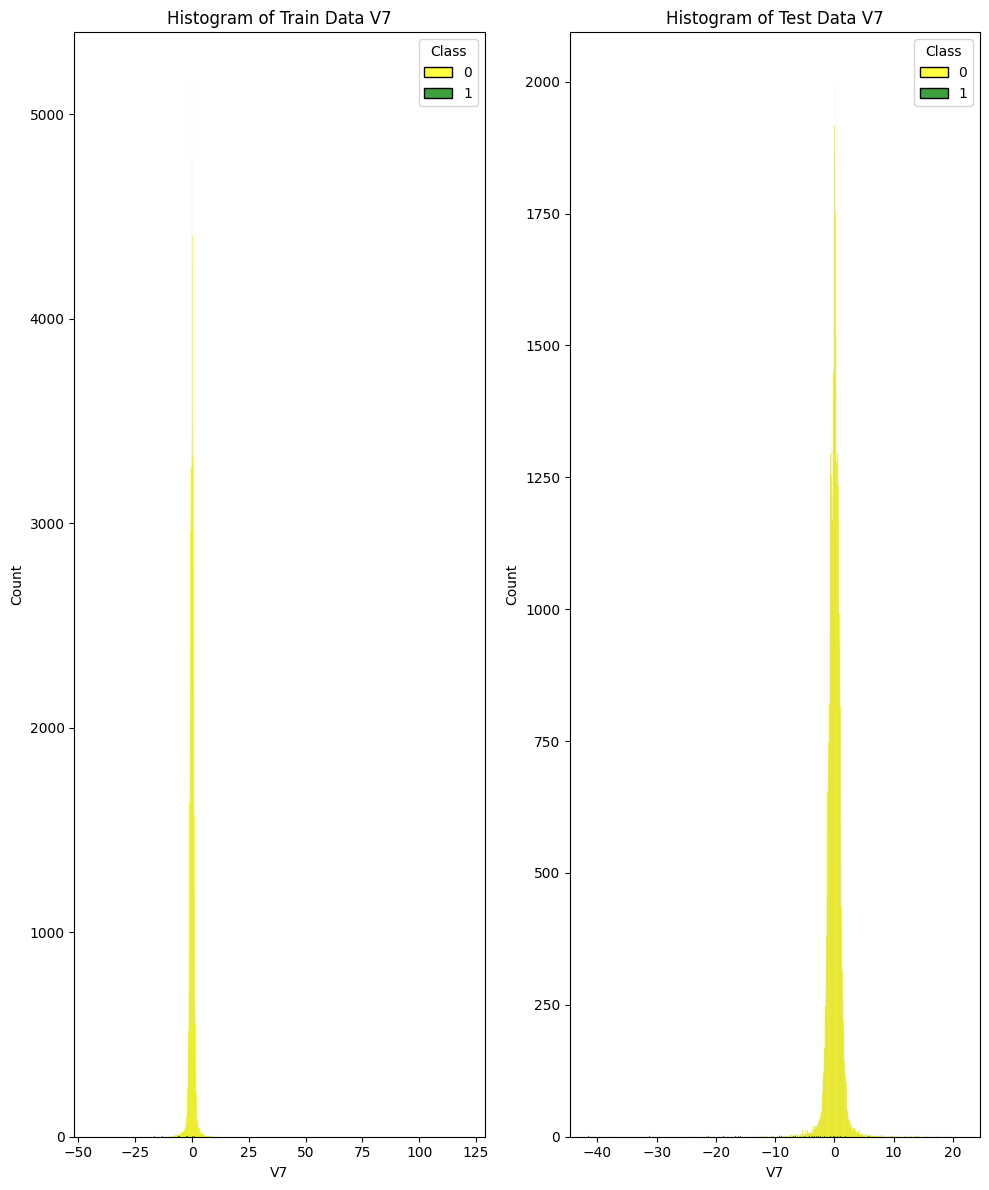

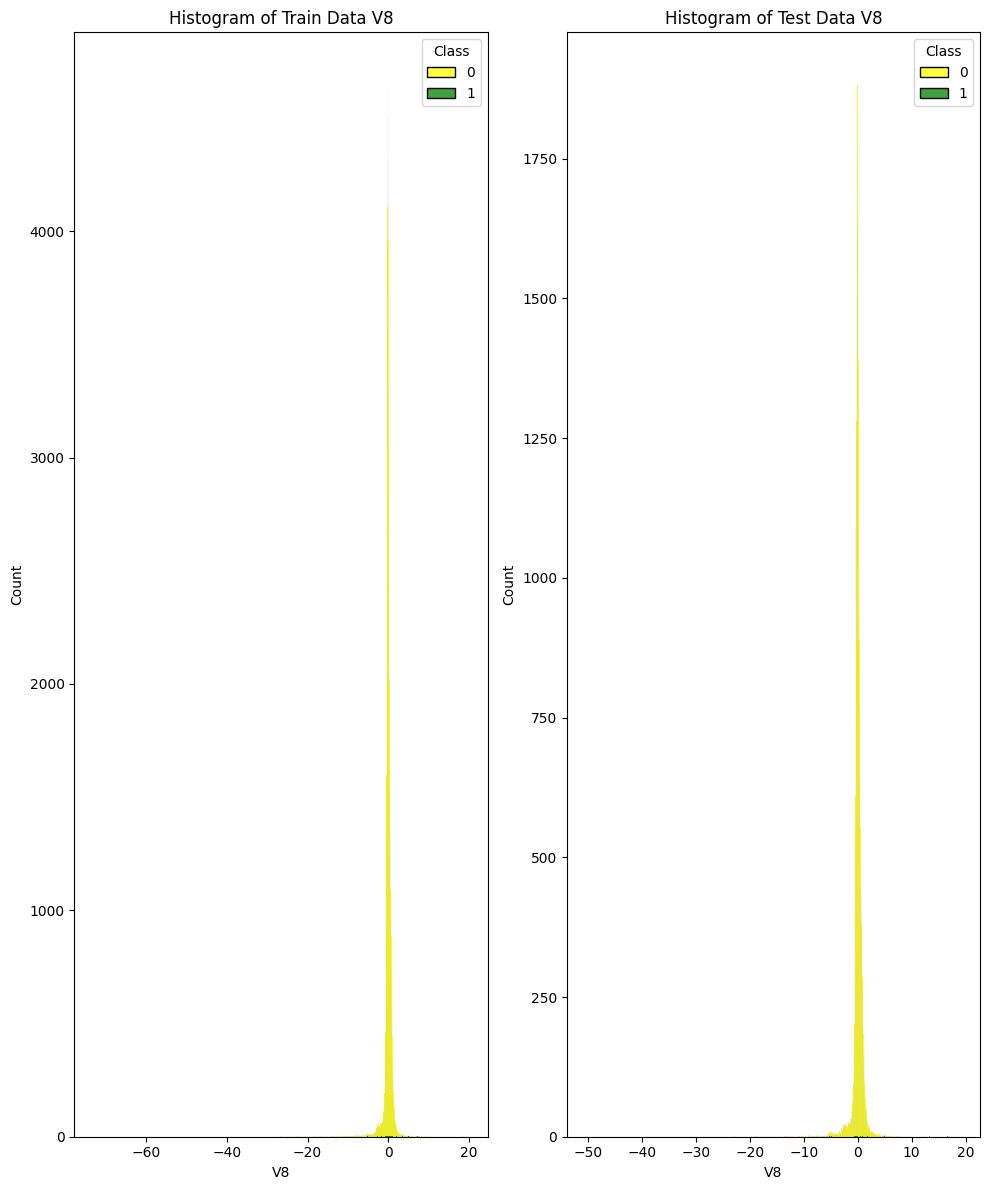

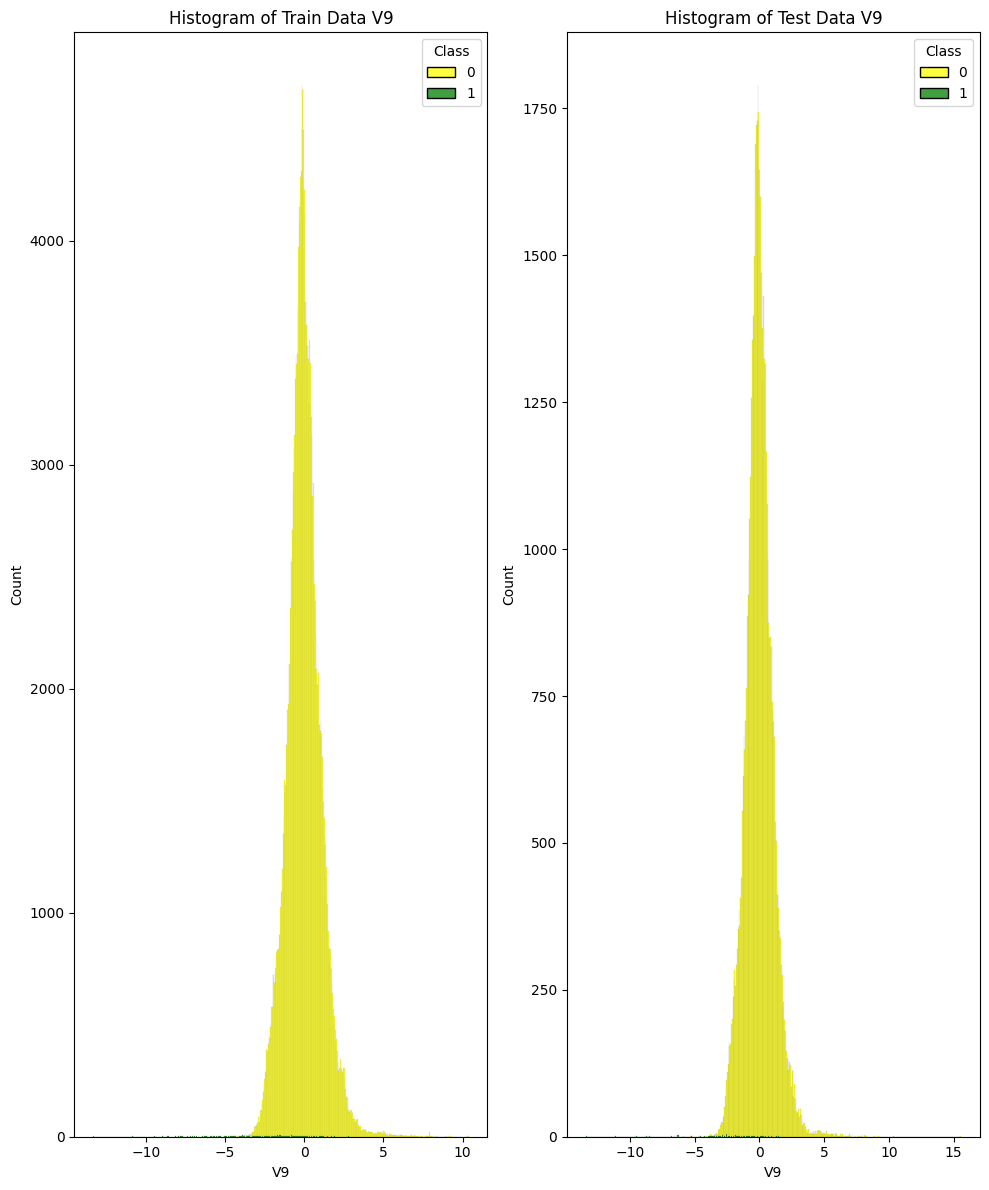

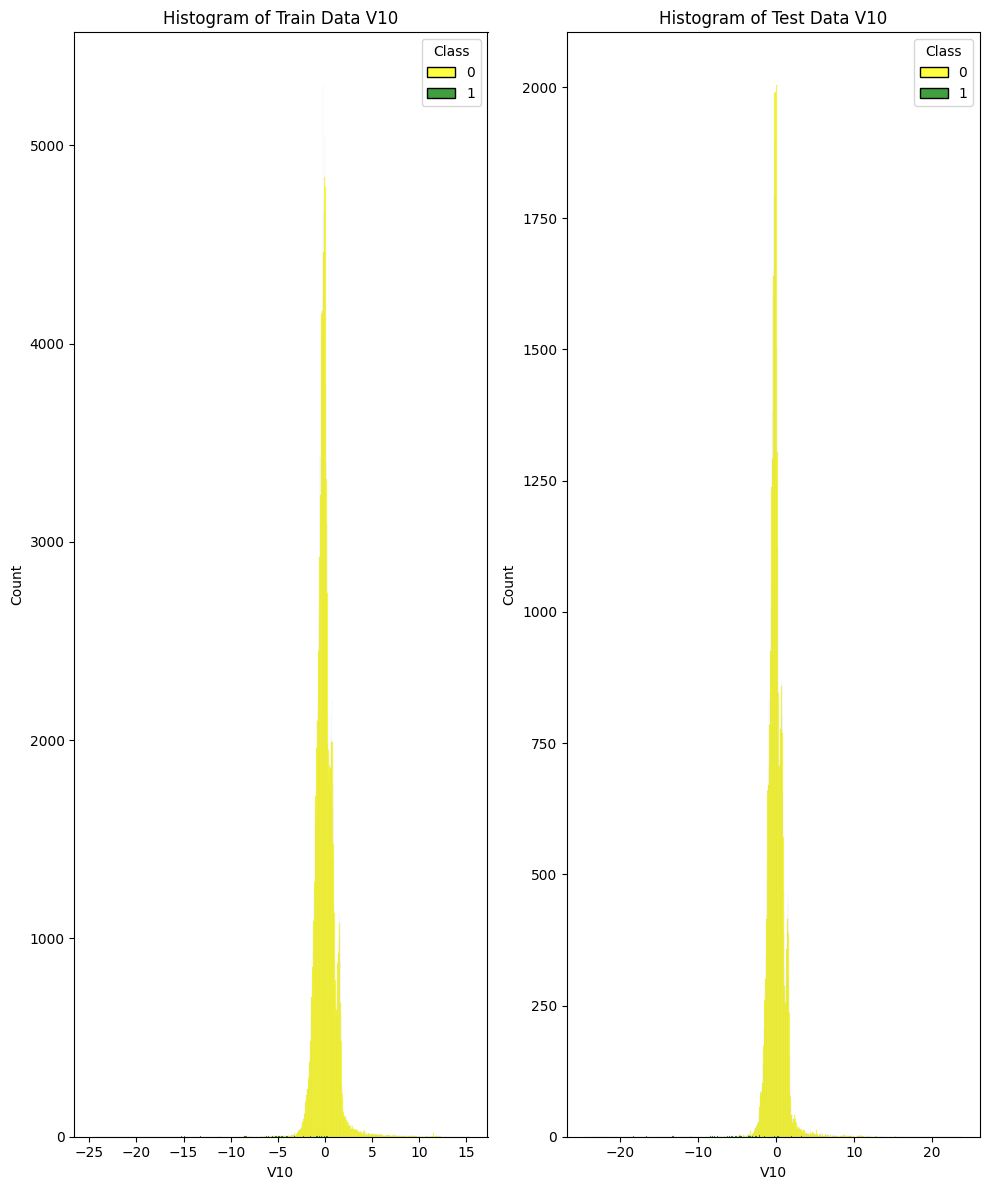

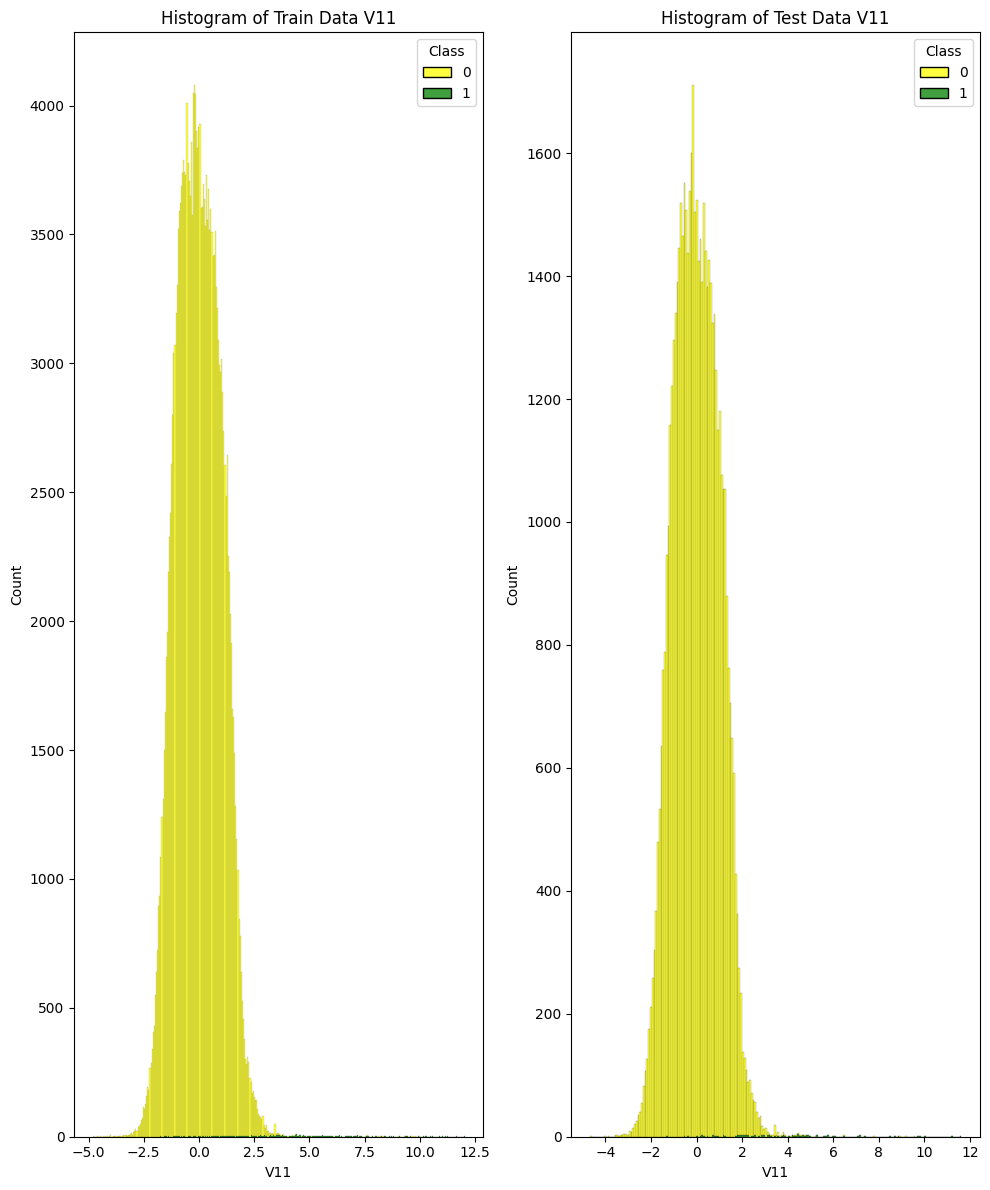

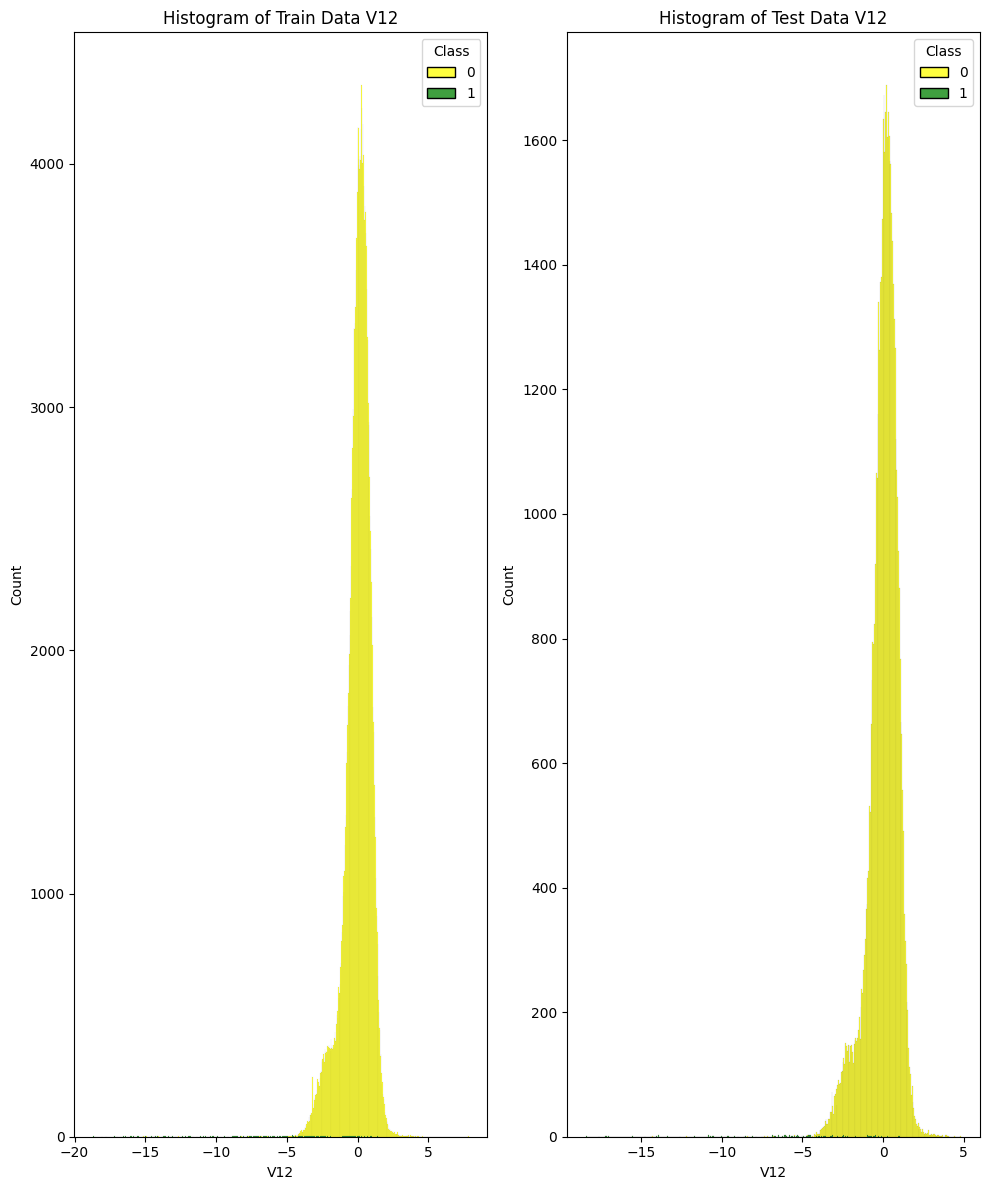

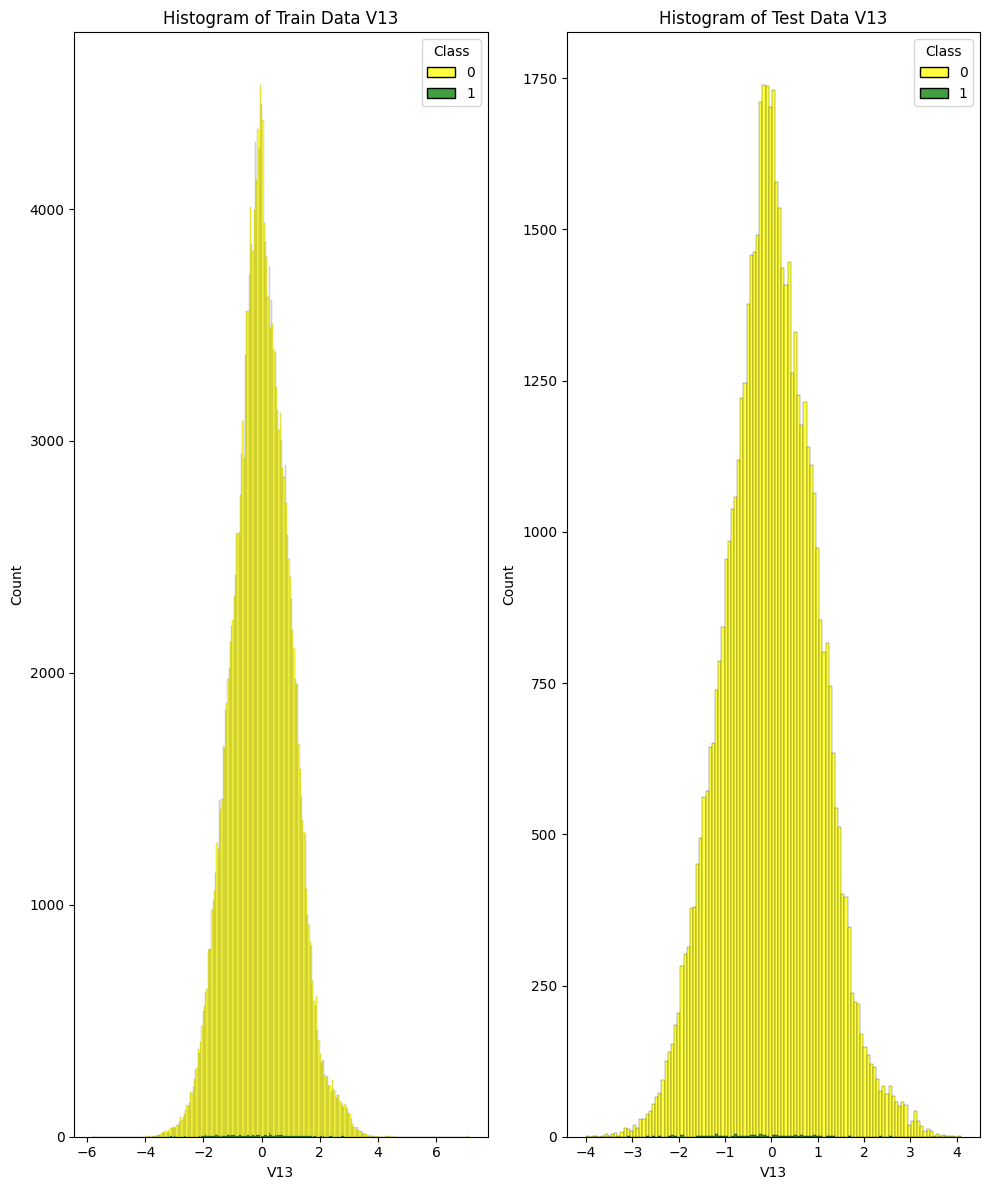

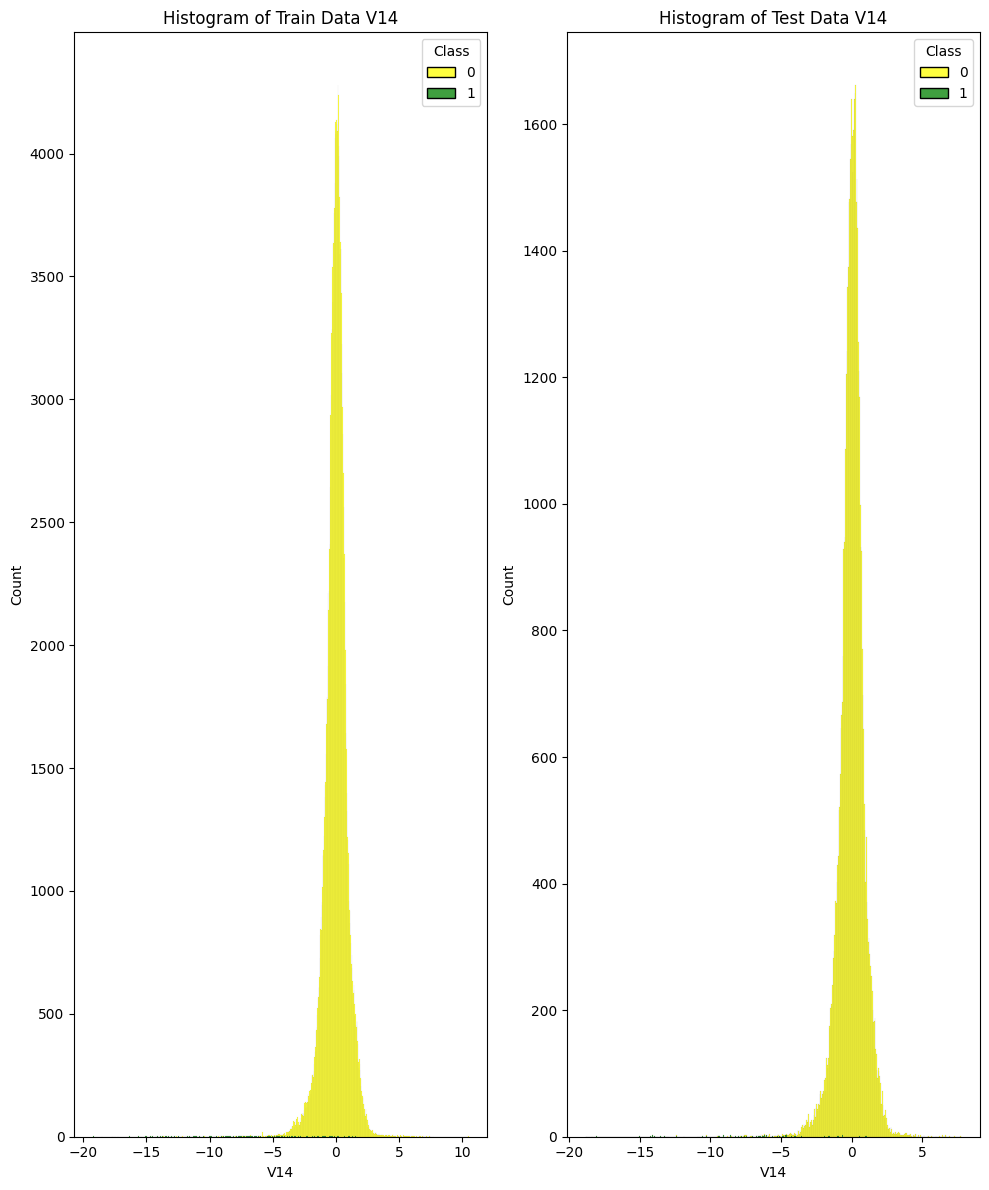

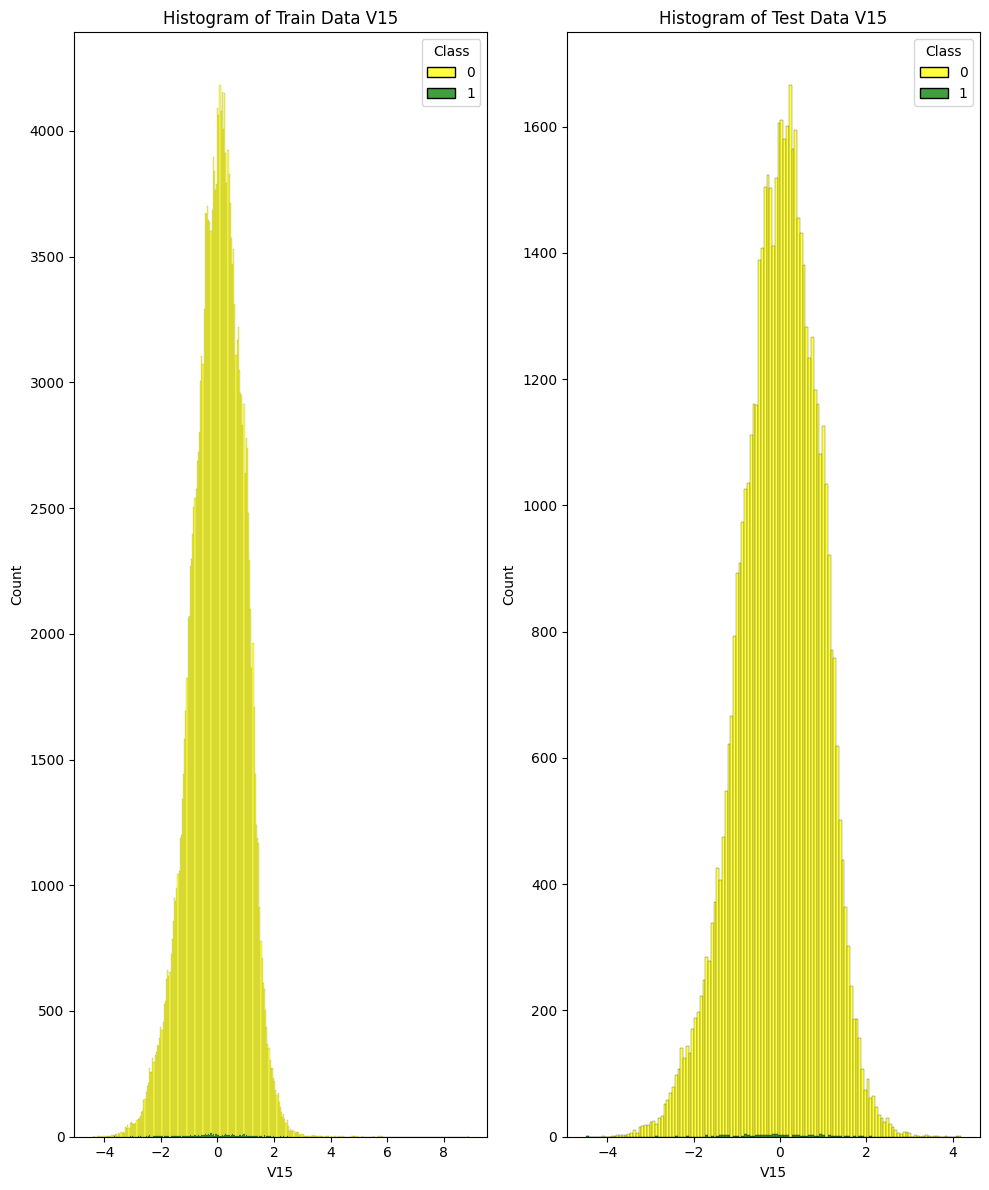

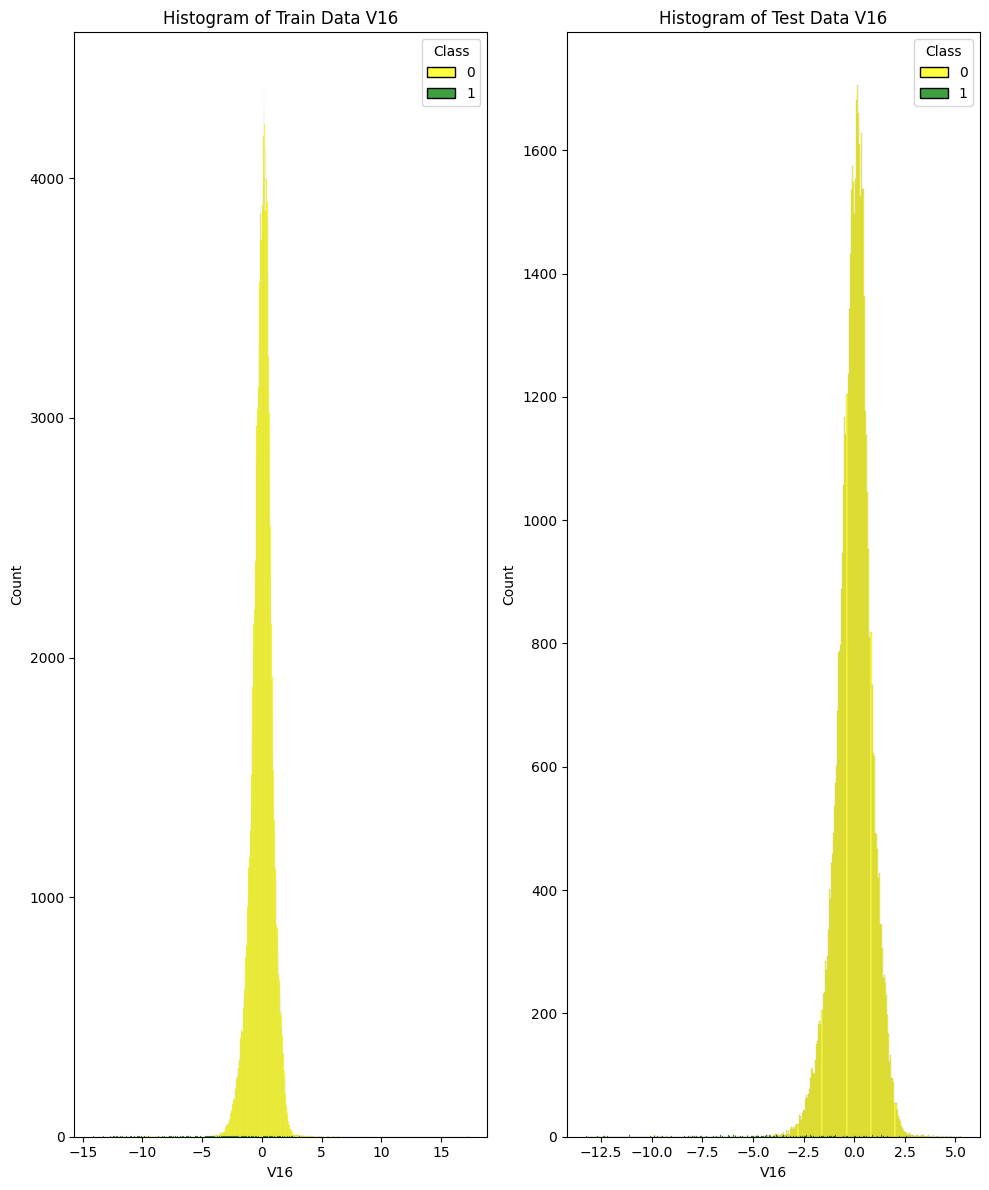

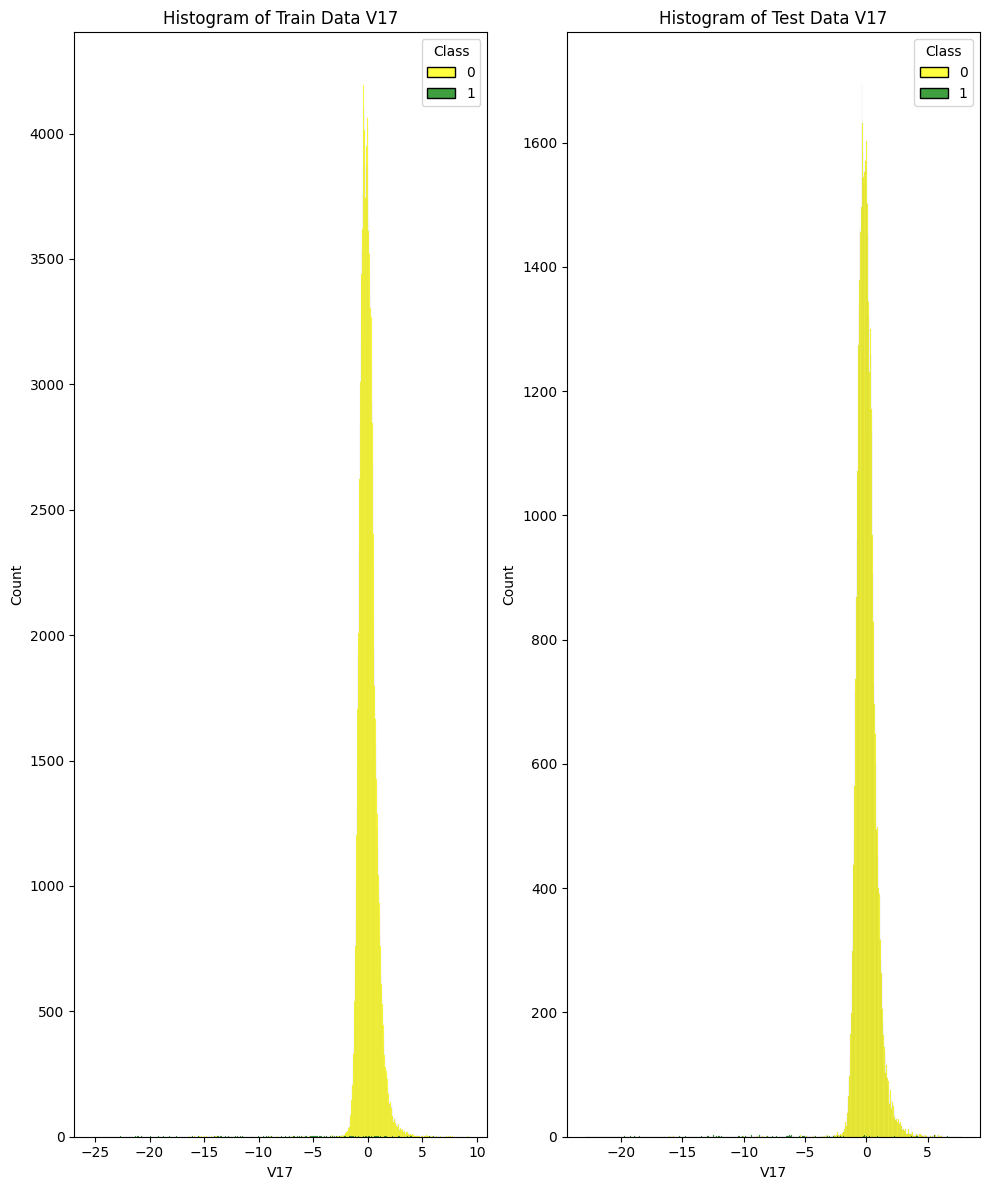

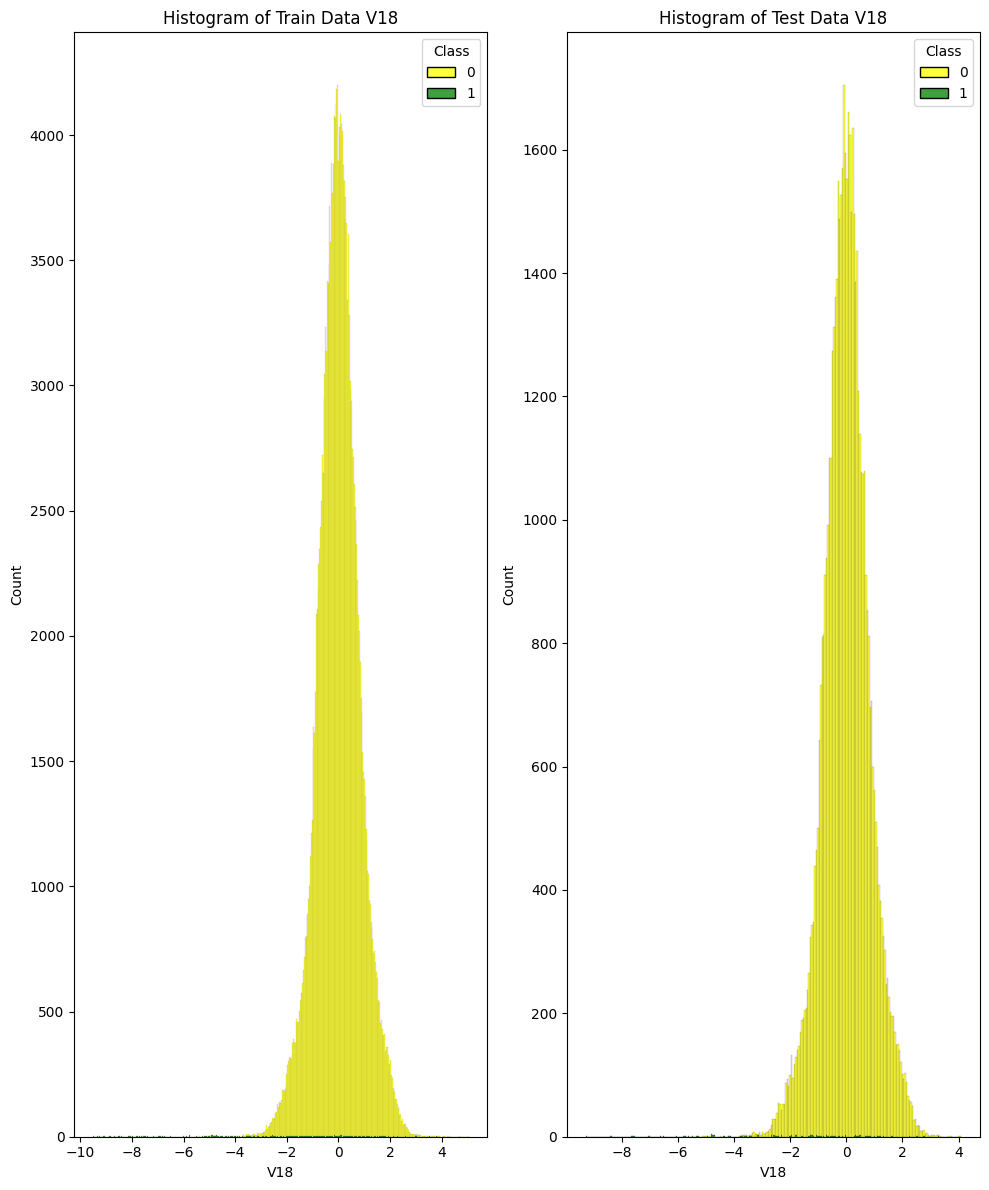

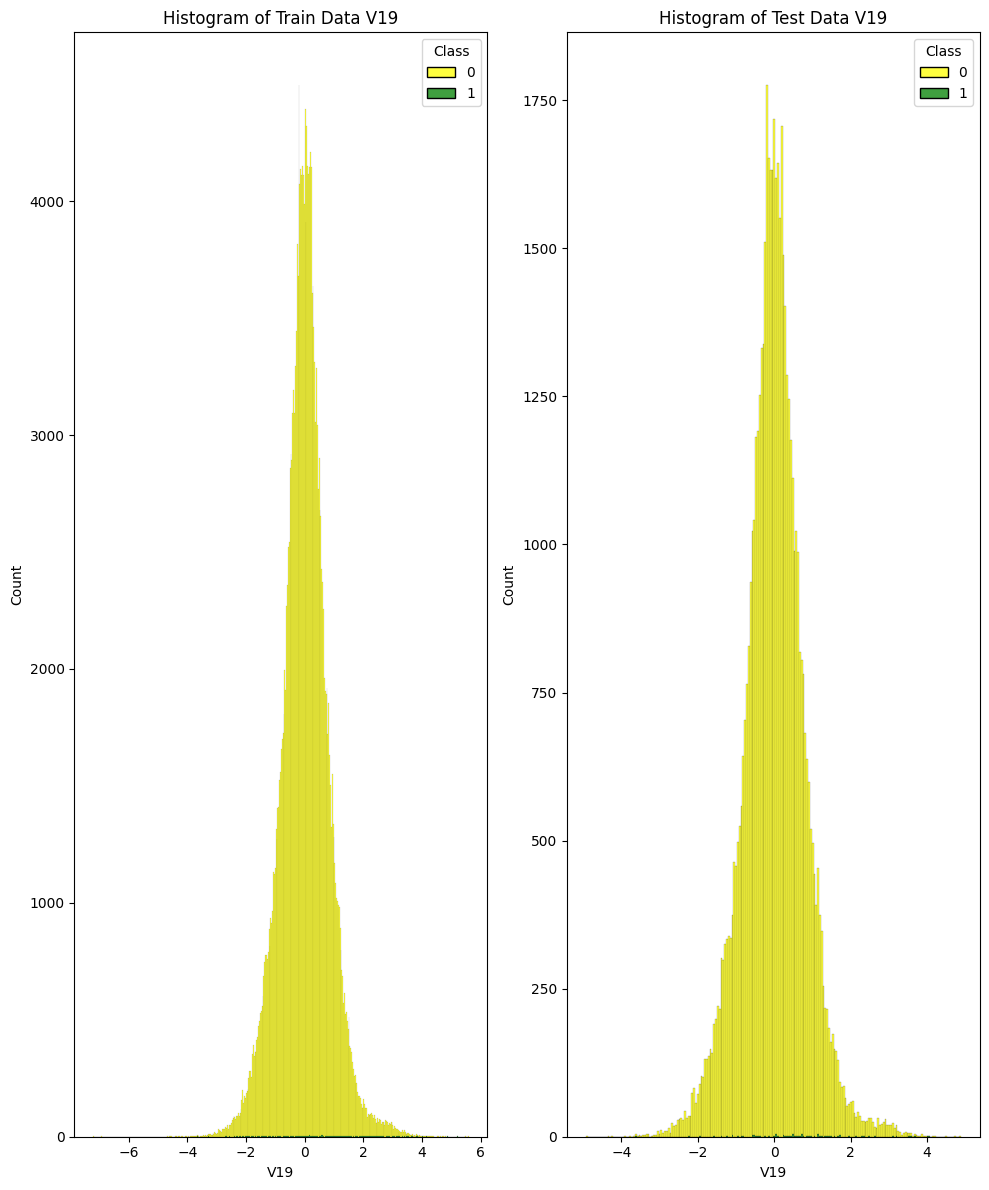

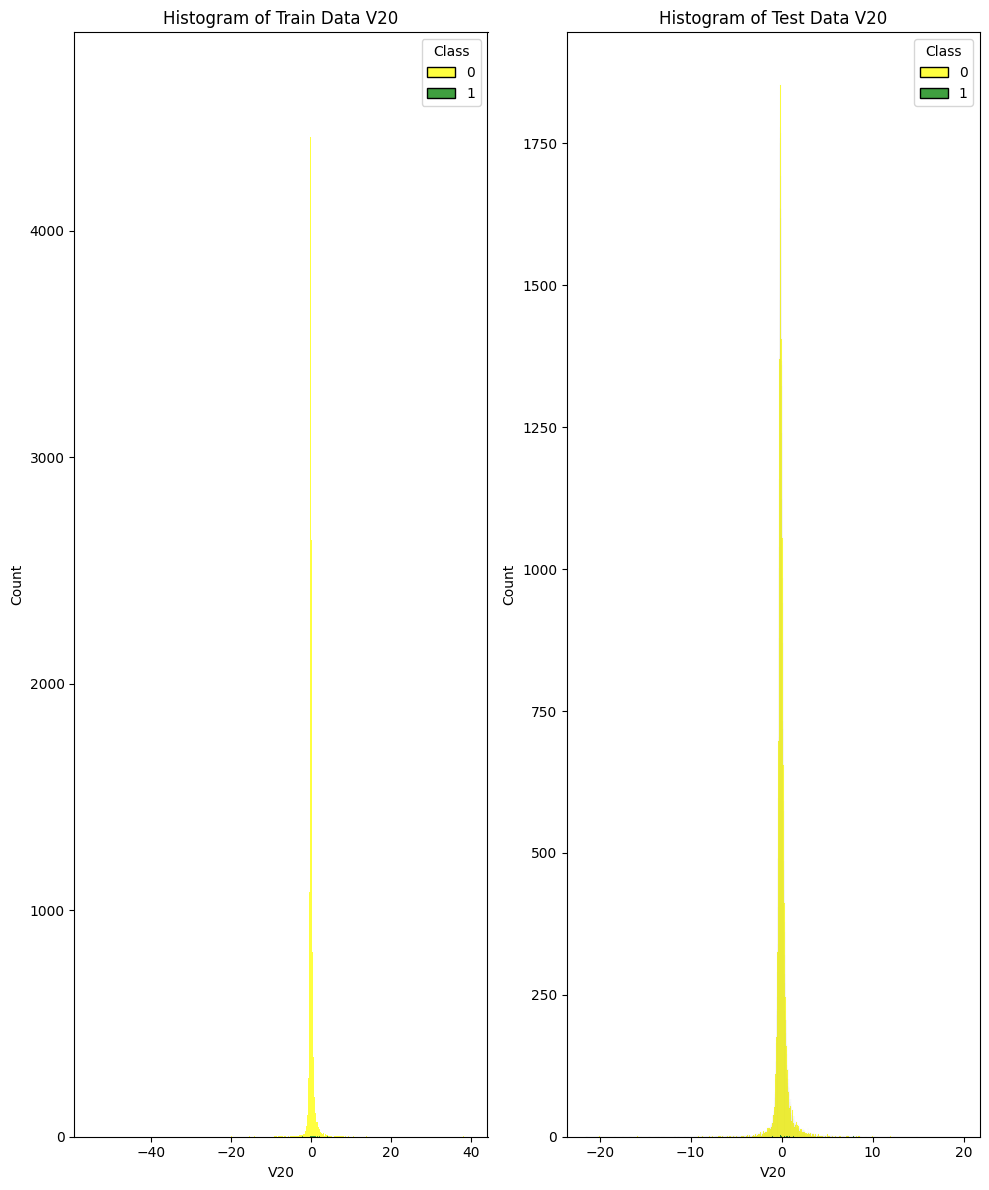

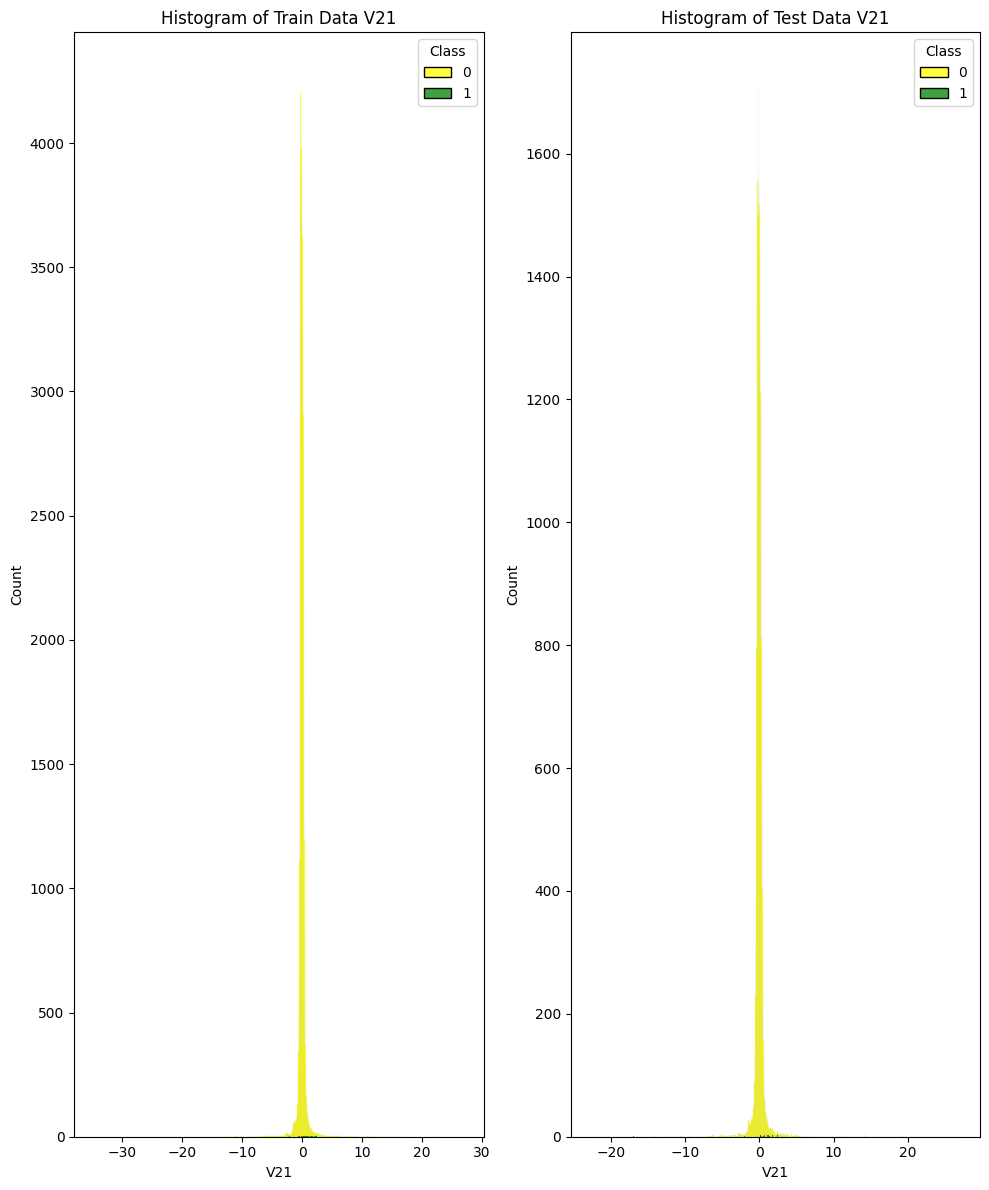

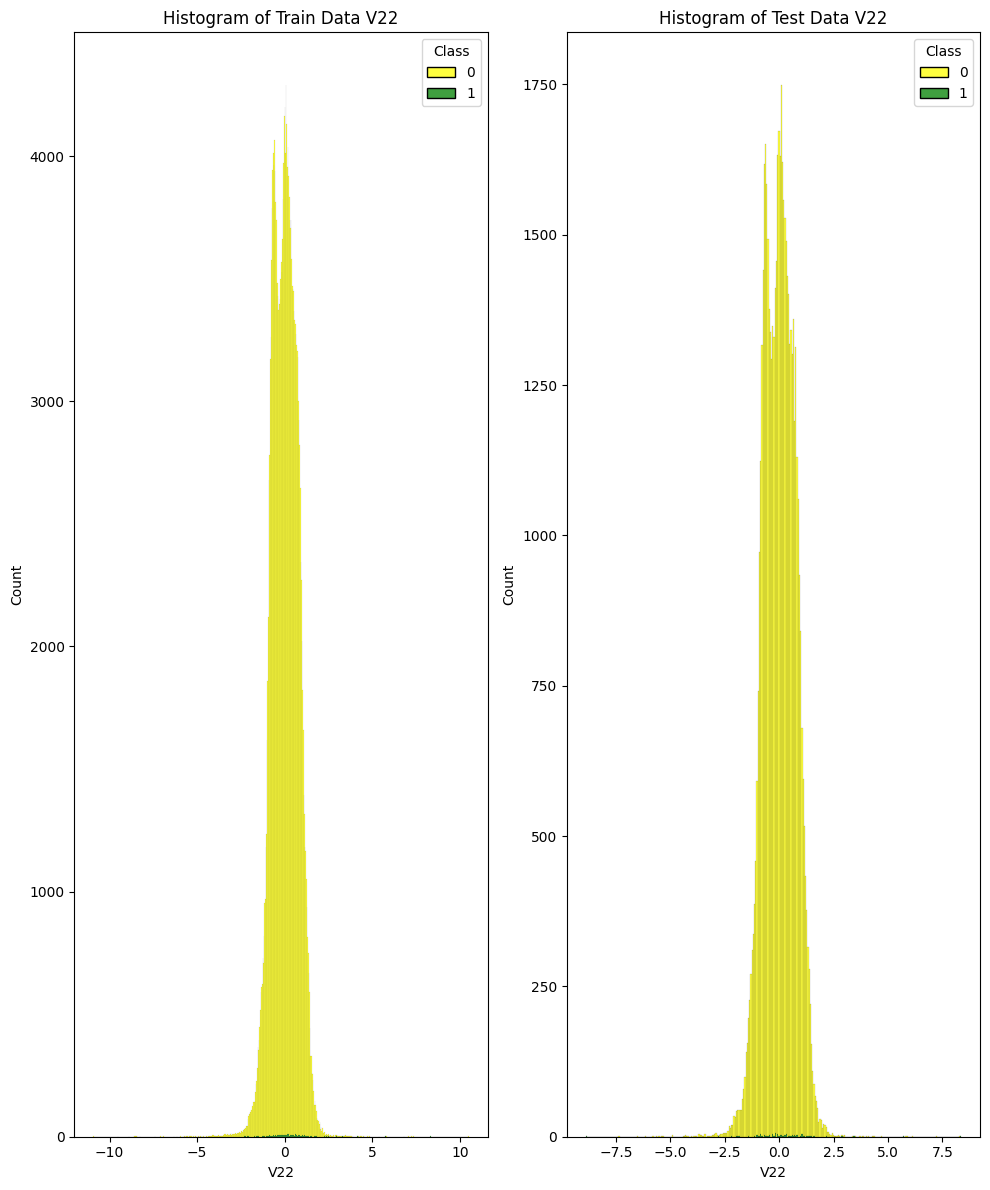

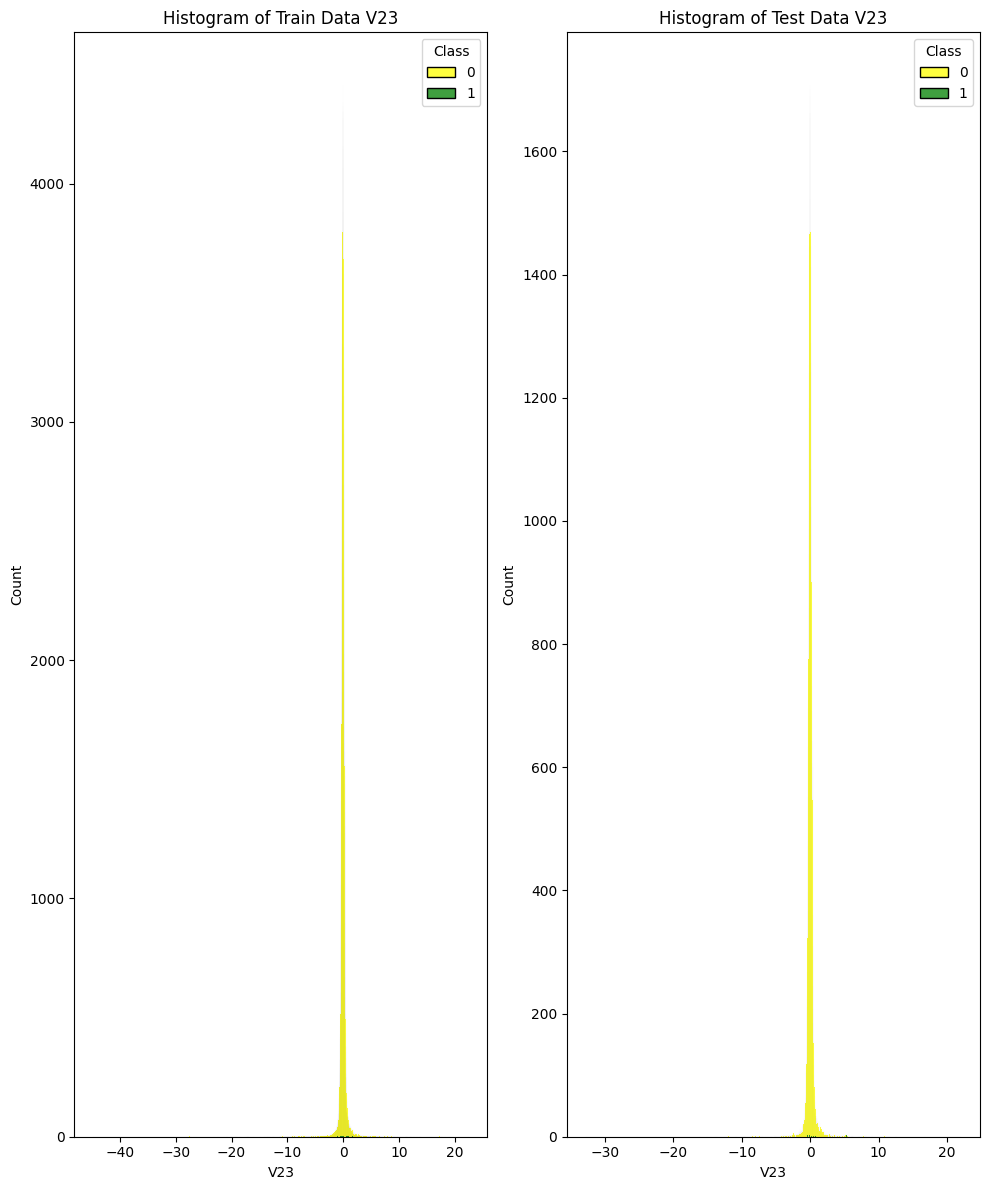

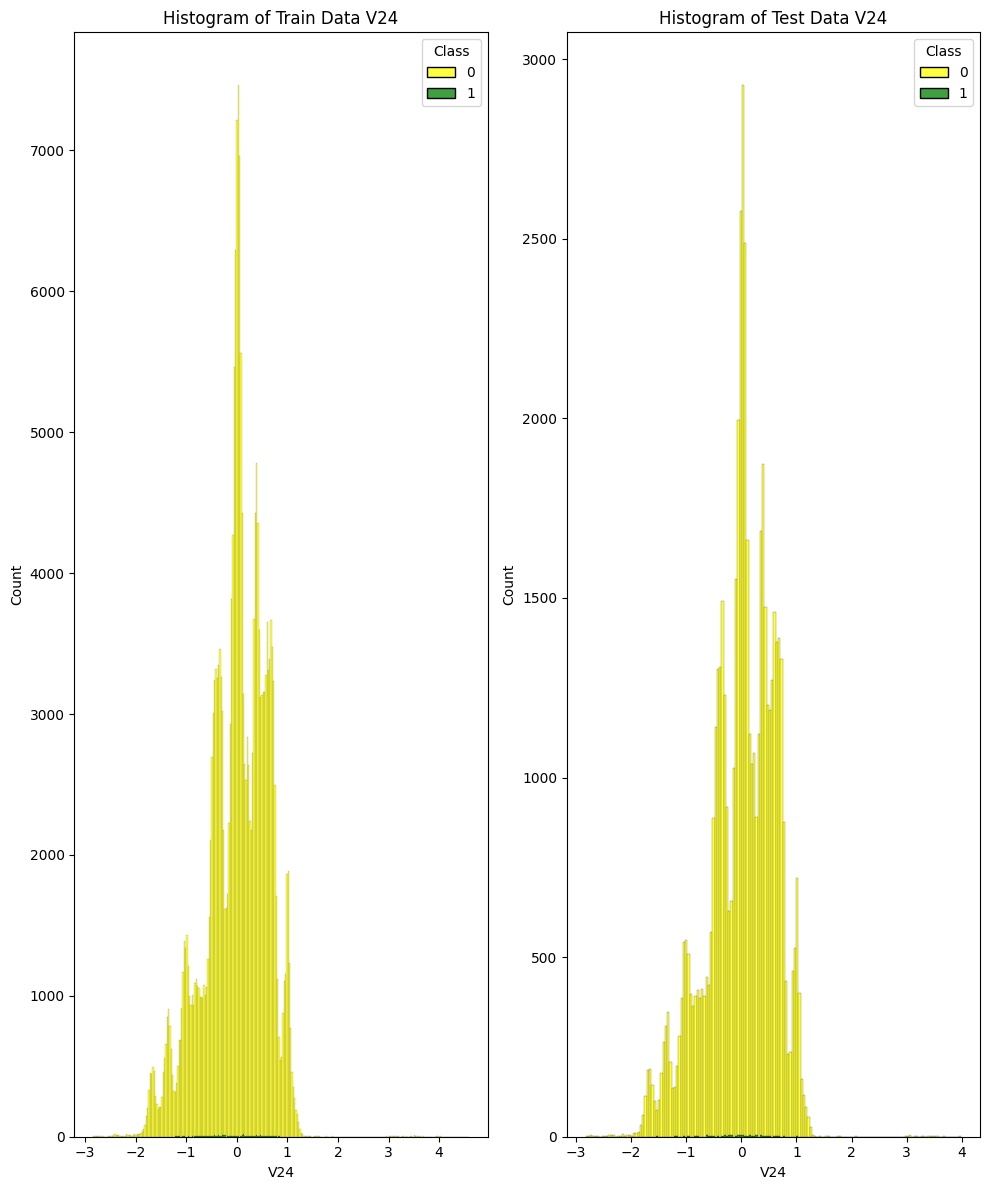

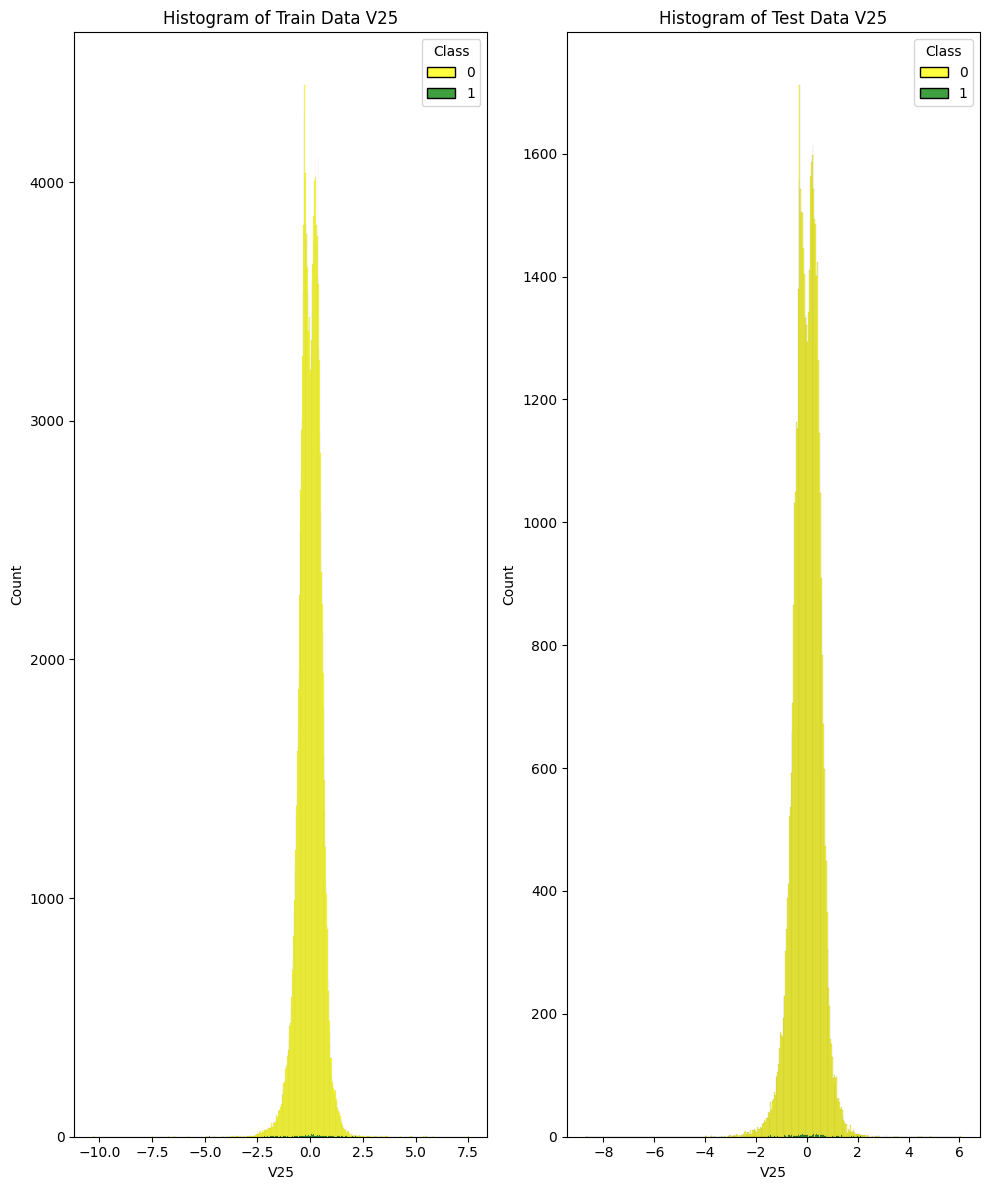

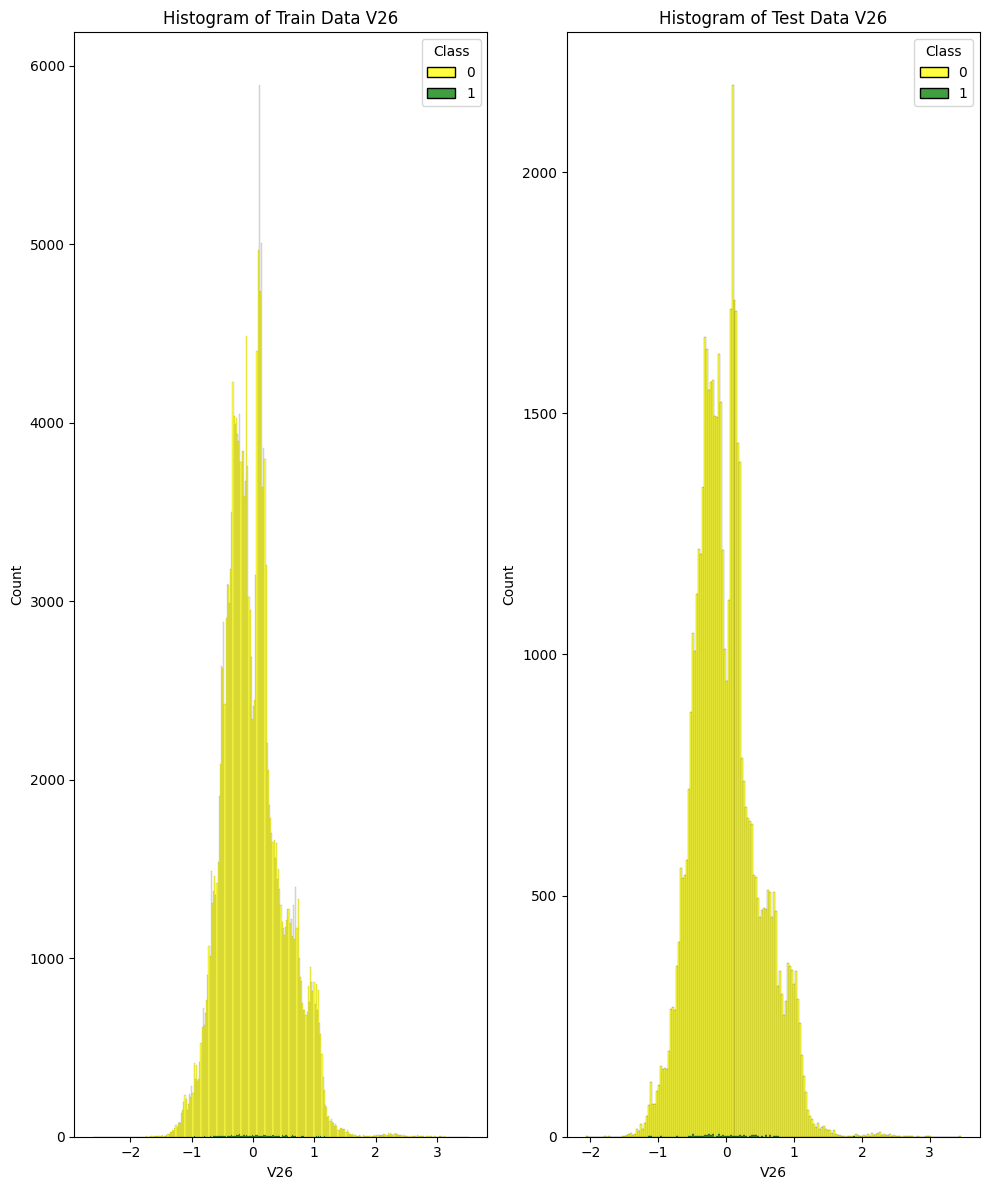

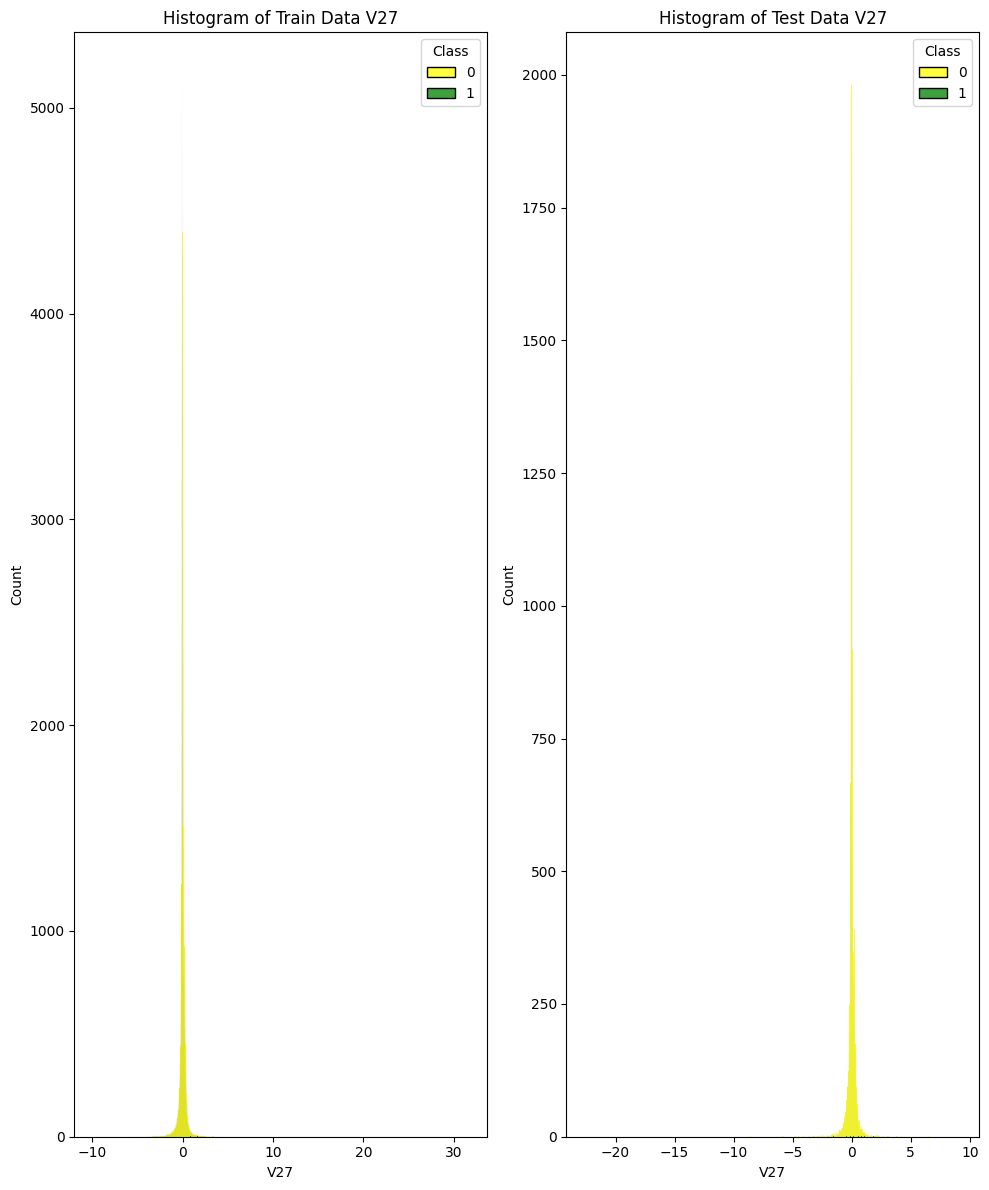

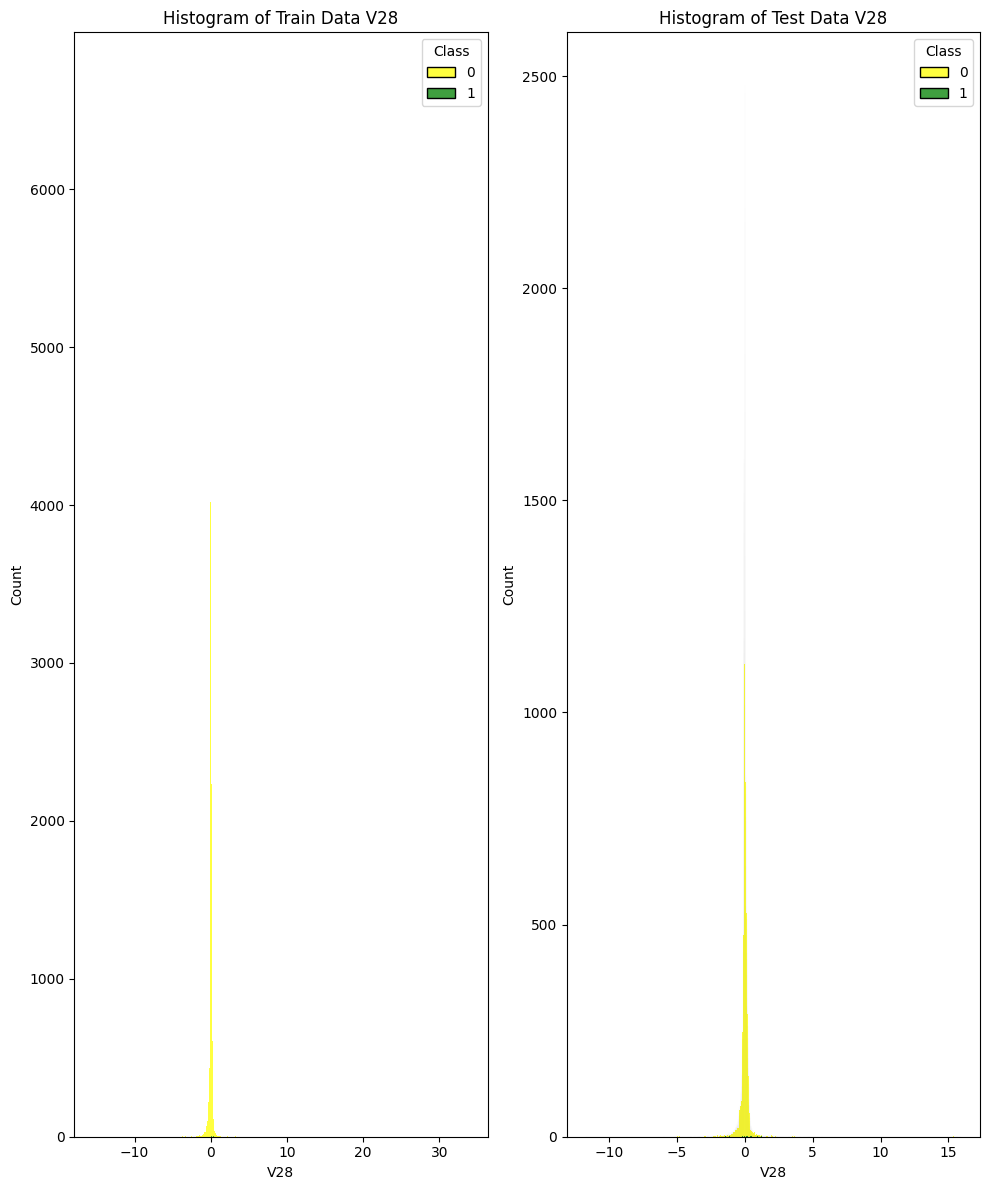

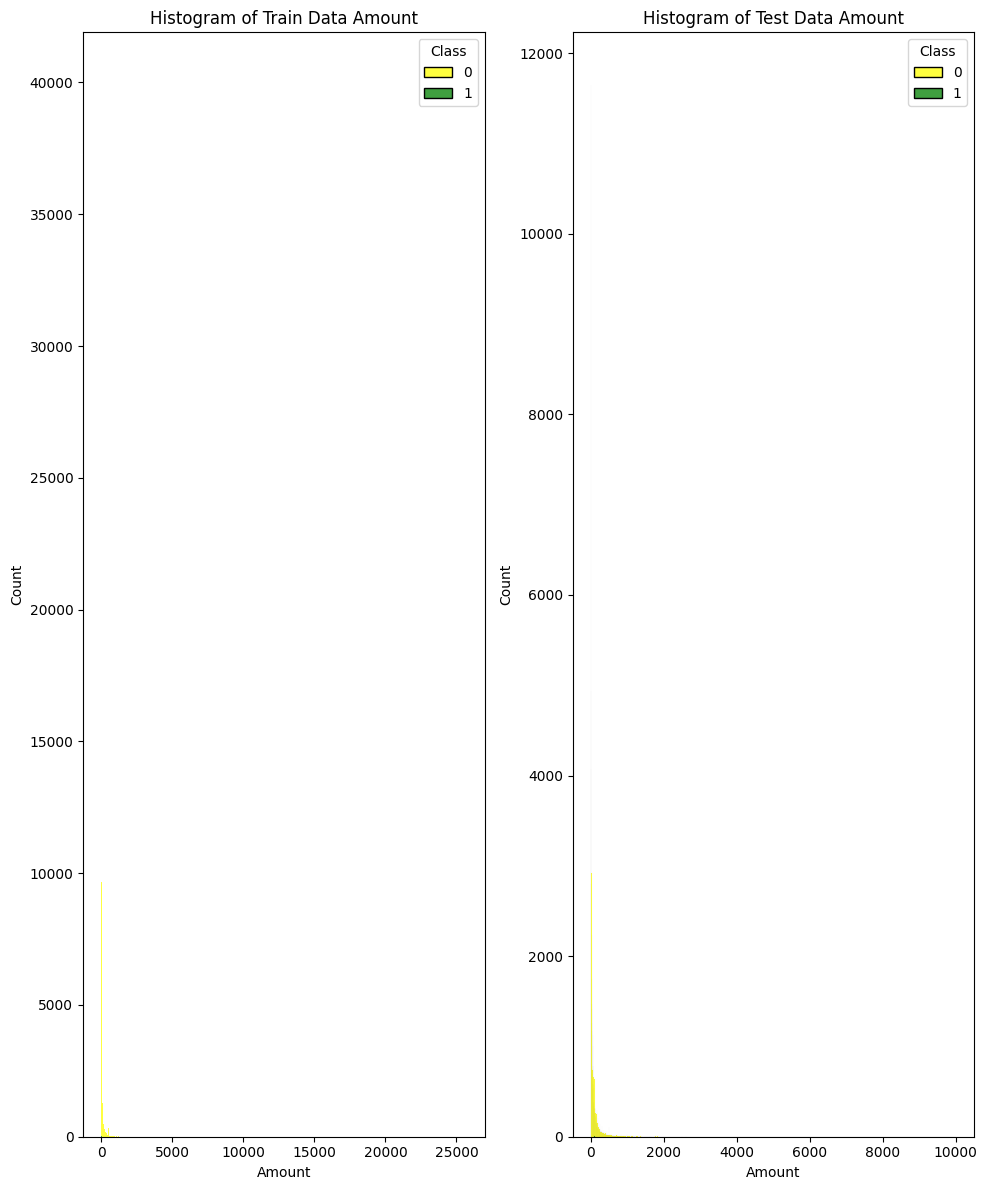

In [7]:
cols=X_train.columns.tolist()
for i in cols:
    multi_hist_plot(X_train,X_test, y_train, y_test, i)

In [8]:
def compute_correlation(X, y):
    train_corrs = {}
    for feature in X.columns:
        train_corrs[feature] = pearsonr(X[feature], y)[0]
    train_corrs = {k: v for k, v in sorted(train_corrs.items(), key=lambda item: item[1], reverse=True)}
    return train_corrs

In [9]:
compute_correlation(X_train, y_train)

{'V11': 0.15596291126109516,
 'V4': 0.13411162381509287,
 'V2': 0.08908401165576278,
 'V21': 0.04190536763201311,
 'V19': 0.03554312829219137,
 'V8': 0.024712354361814064,
 'V27': 0.019653909532640512,
 'V20': 0.01786591659906085,
 'V28': 0.010740883478391422,
 'V26': 0.005436078354062075,
 'Amount': 0.0038074121138406774,
 'V25': 0.0021148545500854813,
 'V22': 0.0008237990070150326,
 'V13': -0.0020344453939470405,
 'V15': -0.004357322592603439,
 'V23': -0.0059887238477432285,
 'V24': -0.007302086774994953,
 'Time': -0.013347055408696731,
 'V6': -0.044695935121287826,
 'V5': -0.0899207109345641,
 'V1': -0.09531623097868215,
 'V9': -0.09718636928038746,
 'V18': -0.11144713943989601,
 'V7': -0.18173698897140464,
 'V3': -0.1888405820104592,
 'V16': -0.19741252829046627,
 'V10': -0.2154979890308951,
 'V12': -0.2633956352046474,
 'V14': -0.30605488450950047,
 'V17': -0.32678983120312083}

In [10]:
compute_correlation(X_test, y_test)

{'V11': 0.15050664492466528,
 'V4': 0.1307869740257318,
 'V2': 0.10028115255177998,
 'V21': 0.03451041810461049,
 'V19': 0.0317297656181706,
 'V20': 0.02919774046941438,
 'Amount': 0.01376796948898276,
 'V23': 0.010849685223051403,
 'V27': 0.00944810164330668,
 'V25': 0.008115528846028286,
 'V28': 0.004726348731539701,
 'V8': 0.0009336473459423798,
 'V22': 0.000732851673699391,
 'V26': 0.0005142249763221932,
 'V15': -0.0036903599284702554,
 'V24': -0.006895659316307632,
 'Time': -0.008213772468977375,
 'V13': -0.01474461732111231,
 'V6': -0.03935153740377939,
 'V9': -0.09991646319379605,
 'V18': -0.11163832738427869,
 'V5': -0.11582777039404439,
 'V1': -0.1255117733068155,
 'V16': -0.1930157862313997,
 'V3': -0.2093964451070325,
 'V7': -0.21002697127404485,
 'V10': -0.22239713230672442,
 'V12': -0.24922427745249978,
 'V14': -0.28840025132138863,
 'V17': -0.32524417731226624}

In [11]:
# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) 

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier()
}

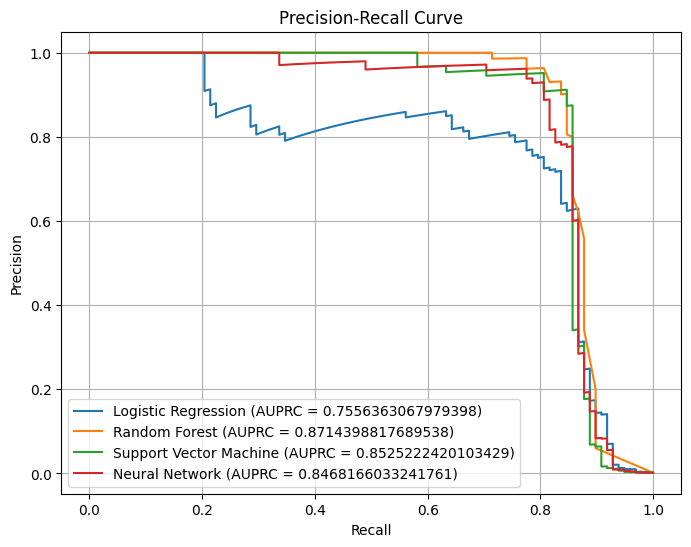

In [14]:
threshold = 0.5  # Set a threshold to determine fraud (1) and non-fraud (0)
y_train_binary = (y_train > threshold).astype(int)
plt.figure(figsize=(8, 6))
    

# Model training and evaluation
results = {}
for name, model in models.items():
    # Fit the model to the training data with binary labels
    model.fit(X_train_scaled, y_train_binary)

    if isinstance(model, SVC) and not model.probability:
        # Use decision_function instead
        y_pred_scores = model.decision_function(X_test_scaled)
        y_pred_proba = (y_pred_scores - y_pred_scores.min()) / (y_pred_scores.max() - y_pred_scores.min())  # Normalize scores
    else:
        # Use predict_proba for other models
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
   

    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (AUPRC = {pr_auc})")

    results[name] = {'confusion_matrix': cm, 'precision_recall_auc': pr_auc}

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
accuracies = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

print("Model Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

Model Accuracies:
Logistic Regression: 0.9991
Random Forest: 0.9996
Support Vector Machine: 0.9993
Neural Network: 0.9995


In [16]:
for result in results:
    print(f"Confusion matrix results for {result} are \n{results[result]['confusion_matrix']}")
    print(f"AUC for {result} is {results[result]['precision_recall_auc']}")

Confusion matrix results for Logistic Regression are 
[[56854    10]
 [   43    55]]
AUC for Logistic Regression is 0.7556363067979398
Confusion matrix results for Random Forest are 
[[56862     2]
 [   22    76]]
AUC for Random Forest is 0.8714398817689538
Confusion matrix results for Support Vector Machine are 
[[56862     2]
 [   37    61]]
AUC for Support Vector Machine is 0.8525222420103429
Confusion matrix results for Neural Network are 
[[56858     6]
 [   20    78]]
AUC for Neural Network is 0.8468166033241761
